In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *


----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
this_date = "20210724"
ts = "08h04m02s"
GCN_num = "014"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

from _03_Networks.GCN_014.GCN_model_014 import *
from _03_Networks.GCN_014.GCN_trainer_014 import *
from _03_Networks.GCN_014.GCN_parameters_014 import *
this_GCN, ts_import = check_import()

GCN_014
at 16h53m48s imported models:
['GCN_HL01_bn_relu', 'GCN_HL01_bn_tanh', 'GCN_HL02_bn_relu', 'GCN_HL02_bn_tanh', 'GCN_HL03_bn_relu', 'GCN_HL03_bn_tanh']
imported parameters from: GCN_parameters_014.py at 16h53m48s
imported trainer: GCN_014 at 16h53m48s


## Reload dictionary

In [4]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210724-08h04m02s/


In [5]:
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

{'input_file_name': '20210710-11h46m35s_timesteps200_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '200',
 'run_date': '20210724-',
 'run_time': '08h04m02s',
 'model': 'GCN_014',
 'combo': ('mean',
  128,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'None',
  True,
  'tanh'),
 'random_seed': 42314,
 'train_size': 0.9,
 'batch_size': 128,
 'Nepochs': 5000,
 'save_every': 500,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'use_edges_attr': True,
 'activation_function': 'tanh',
 'shuttle_train_frame': 9,
 'shuttle_val_frame': 13,
 'num_rows_training': 127,
 'num_rows_validation': 13,
 'num_rows_test': 2,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 6,
 'size_output': 3,
 'model_architecture': GCN_HL03_bn_tanh(
   (conv1): GraphConv(6, 128)
   (conv2): GraphConv(128, 256)
   (conv3): GraphConv(256, 64)
   (conv4): GraphConv(64, 3)
   (bn1): GraphNor

In [6]:
input_file_name = reloaded_dict["input_file_name"]
reloaded_dict["model_architecture"]

GCN_HL03_bn_tanh(
  (conv1): GraphConv(6, 128)
  (conv2): GraphConv(128, 256)
  (conv3): GraphConv(256, 64)
  (conv4): GraphConv(64, 3)
  (bn1): GraphNorm(128)
  (bn2): GraphNorm(256)
  (bn3): GraphNorm(64)
)

## Plot losses

In [51]:
# first lossess paths

curr_epoch = 5000
tot_epoch = 5000
type_epoch = "FINAL"



In [52]:
# load losses

#if type_epoch == "TEMP":
load_path_files = os.path.join(MODEL_OUTPUT_PATH_TODAY,f"{this_date}-{ts}EPOCH_{curr_epoch}of{tot_epoch}_{type_epoch}__{type_epoch}__")
t_path =  f"{load_path_files}training_loss.pkl"
v_path =  f"{load_path_files}validation_loss.pkl"
lr_path = f"{load_path_files}learning_rate.pkl"
t_losses_load = pkl.load(open(t_path, 'rb'))
v_losses_load = pkl.load(open(v_path, 'rb'))
lr_load = pkl.load(open(lr_path, 'rb'))
#else: 
  # load losses
    #t_losses_load.extend(pkl.load(open( reloaded_dict['train_losses_path'], 'rb')))
    #v_losses_load.extend(pkl.load(open( reloaded_dict['val_losses_path'], 'rb')))
    #lr_load.extend(pkl.load(open( reloaded_dict['lr_path'], 'rb')))  

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210724-08h04m02s/20210724-08h04m02s_train_val_loss_plot.png


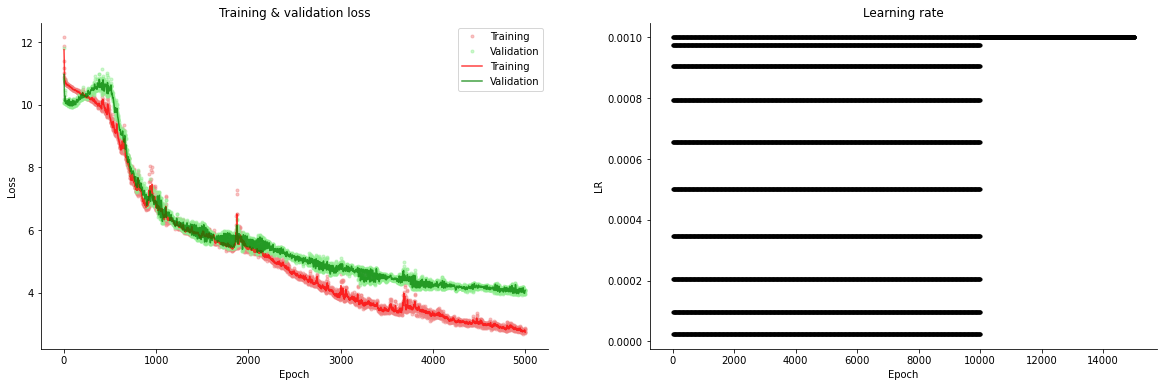

In [54]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load[:curr_epoch],
                  v_losses_load[:curr_epoch],
                  learning_rate = lr_load,
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

In [55]:
min(v_losses_load), v_losses_load.index(min(v_losses_load))

(2.4151127338409424, 9886)

In [56]:
min(t_losses_load), t_losses_load.index(min(t_losses_load))

(0.7594173550605774, 9881)

## Verification
of results

In [57]:
hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
size_input = reloaded_dict['size_input']
size_output = reloaded_dict['size_output']
random_seed = reloaded_dict["random_seed"]
activation_fun = reloaded_dict["activation_function"]

In [58]:
size_input,size_output

(6, 3)

In [59]:
##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)
    
#print (printstat)
#pdb.set_trace()

## TANH

if activation_fun == "tanh":
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            printstat = printstat, 
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            printstat = printstat,   
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            printstat = printstat,                
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_tanh(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    printstat = printstat, 
                    )
        
#### RELU       
        
elif activation_fun == "relu": 
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            printstat = printstat,                 
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            printstat = printstat,                 
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            printstat = printstat,               
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_relu(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    printstat = printstat,                                      
                    )
else:
    print (f"ERROR: model with {activation_fun=} not implemented")

load_model = model

In [60]:
load_path = reloaded_dict['model_path']
print (load_path)
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210724-08h04m02s/20210724-08h04m02sEPOCH_5000of5000_FINAL__GCN_014.pt


GCN_HL03_bn_tanh(
  (conv1): GraphConv(6, 128)
  (conv2): GraphConv(128, 256)
  (conv3): GraphConv(256, 64)
  (conv4): GraphConv(64, 3)
  (bn1): GraphNorm(128)
  (bn2): GraphNorm(256)
  (bn3): GraphNorm(64)
)

In [63]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                     recursive=True))

dataset_train = None

print ()
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )
else: 
    datasets_list_train = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'_dataset_01*',
                                     recursive=True))
    
    #print (*datasets_list_train, sep ="\n")

In [17]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 11.90it/s]

found 10 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210724-08h04m02s/figures_validation_set/
the gif will be create using the first 10 images


10it [00:00, 12.25it/s]


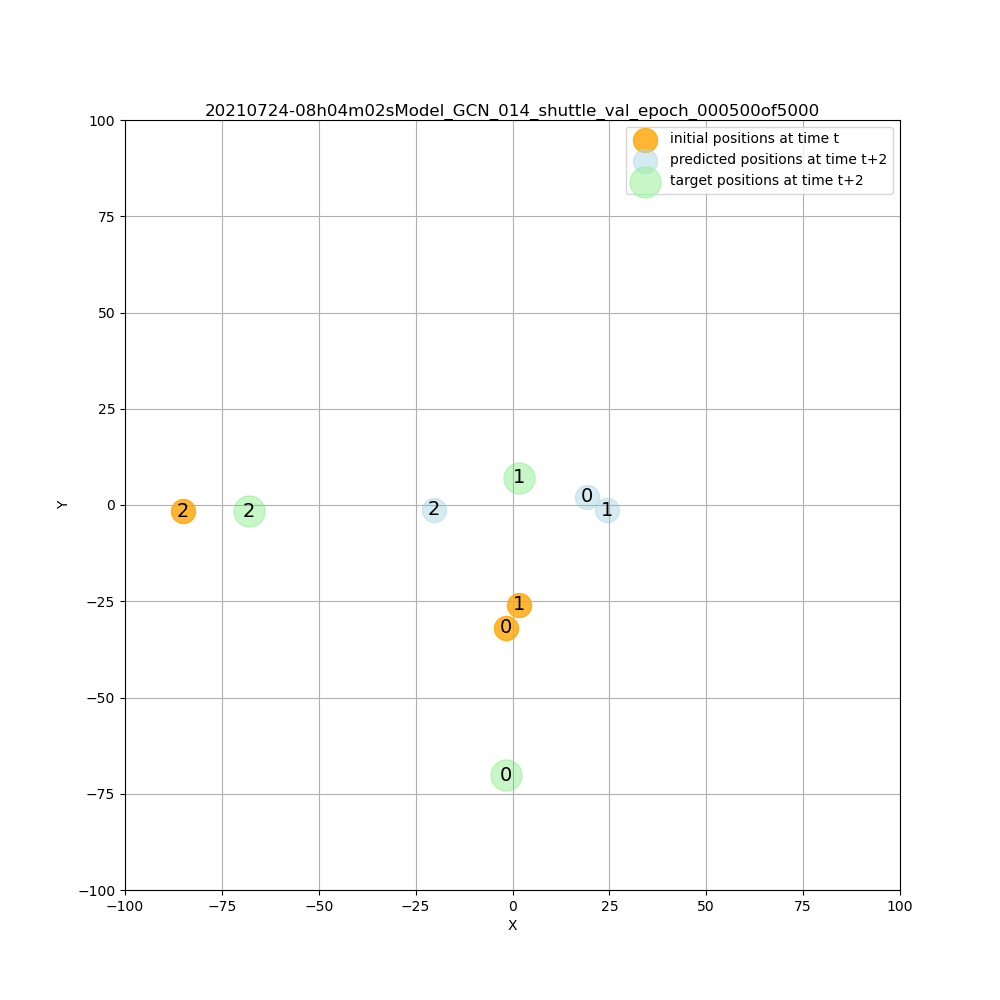

In [18]:
Image(open(f'{path_GIF}','rb').read())

In [19]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 12.25it/s]

found 10 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210724-08h04m02s/figures_training_set/
the gif will be create using the first 10 images


10it [00:00, 12.41it/s]


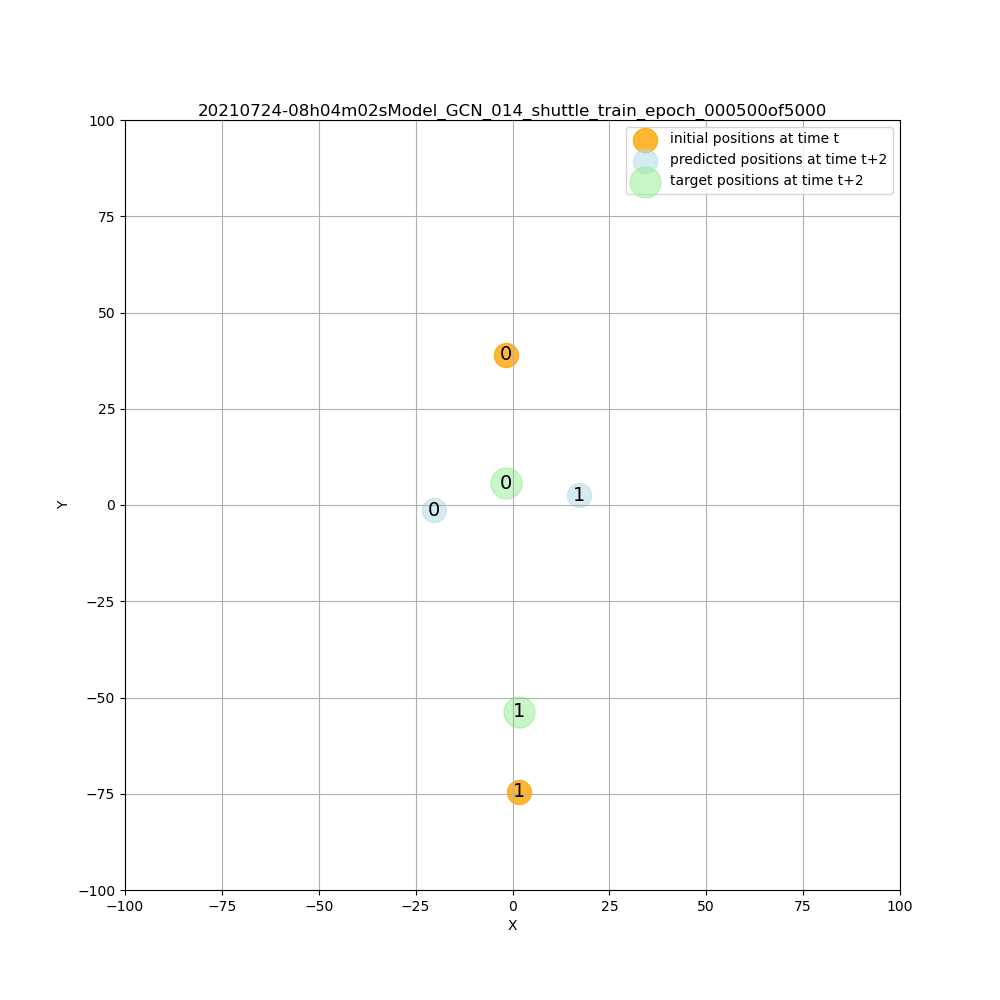

In [20]:
Image(open(f'{path_GIF}','rb').read())

In [21]:
#deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)

## try with many different images... any difference? 

In [22]:
MODEL_OUTPUT_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/'

In [62]:
datasets_list_train = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'_dataset_01*',
                                     recursive=True))

print (*datasets_list_train, sep ="\n")
datasets_list_val = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'_dataset_02*',
                                     recursive=True))

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/20210710-11h46m35s_timesteps200_ec3500_em7000_113_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc__dataset_01_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/20210710-11h46m35s_timesteps200_ec3500_em7000_127_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_01_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/20210710-11h46m35s_timesteps200_ec3500_em7000_size11_8_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc__dataset_01_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7000_10588_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_01_train.pt
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/20210710-20h38m27s_timesteps14930_ec3500_em7

## TODO: UPDATE THE DATASET!

In [64]:
if dataset_train is None: 
    i = 1
    dateset_train_path = datasets_list_train[i]
    dateset_val_path = datasets_list_val[i]
    #f"{MODEL_OUTPUT_PATH}DATASETS/20210801-08h53m15s_timesteps50000_ec3500_em7000_25664_IN_data_pos_zc_data_x_speed_data_x_yaw_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_01_train.pt"
    dateset_train = torch.load(f'{dateset_train_path}')
    dateset_val = torch.load(f'{dateset_val_path}')

In [65]:
dateset_train

[Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[15], edge_index=[2, 15], x=[6, 6], y=[6, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3]),
 Data(edge_attr=[36], edge_index=[2, 36], x=[9, 6], y=[9, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[45], edge_index=[2, 45], x=[10, 6], y=[10, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3]),
 Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3]),
 Data(edge_attr=[15], edge_index=[2, 15], x=[6, 6], y=[6, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3]),
 Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6

In [67]:
len(dateset_train),len(dateset_val)

(127, 13)

In [36]:
device

device(type='cuda', index=0)

In [37]:
from config_GCN_017 import *

In [68]:
losses = losses_results_model(
                               load_model, 
                               dateset_val,
                               device = "cpu",
                               start_from = 0,
                               end_at = len(dateset_train),
                               edges_attr = True,

                               printstat = False,       
                               loss_stat = "L1"
                              )
print (min(losses))
print (max(losses))
print (mean(losses))


100%|██████████| 13/13 [00:00<00:00, 197.06it/s]

5.609288692474365
16.81752586364746
10.455594833080585


In [69]:
min_ind = losses.index(min(losses))
max_ind = losses.index(max(losses))


7

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  1.6100,   7.1500,   5.8872,   4.9400,   3.0000,   0.0000],
        [ 16.4300,   1.6000,   4.7124,   9.4000,   3.0000,   0.0000],
        [-42.0300,  -1.6000,   1.5708,   7.4800,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8, 

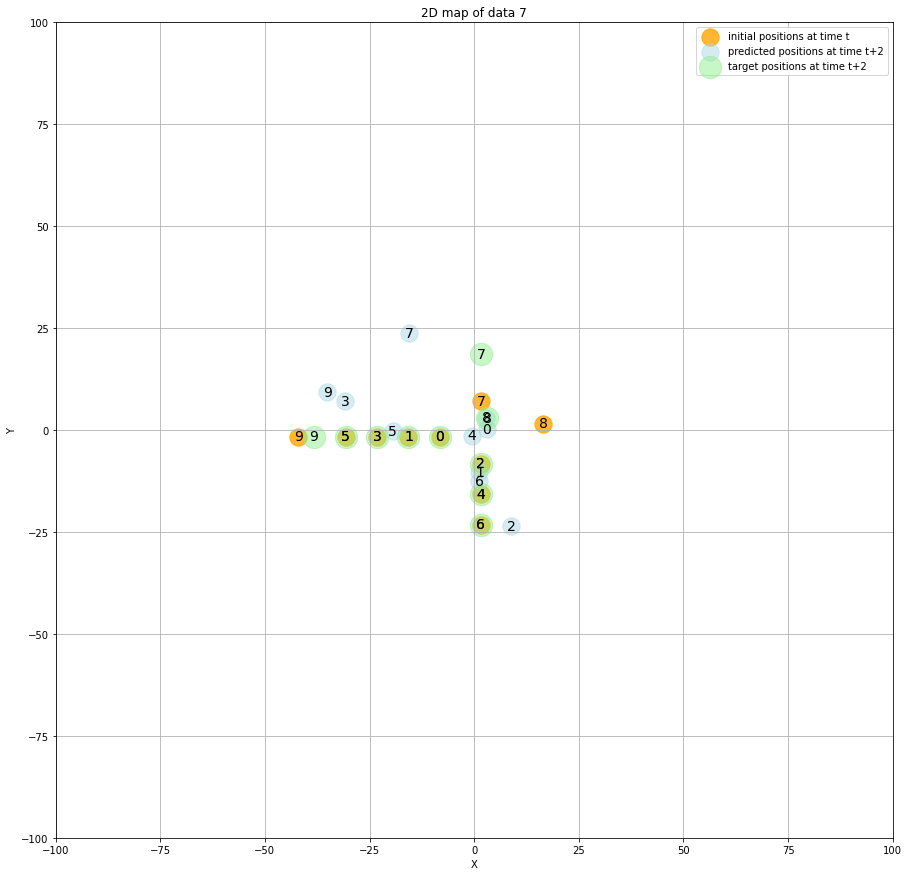

In [70]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_val,
                       start_from = min_ind,
                       end_at = min_ind+1,
                       edges_attr = True,
                       figsize = (15,15),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,       

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )


10

 INPUT
x=tensor([[  8.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 15.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ 23.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 30.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ -1.6000,  94.9000,   3.1416,   0.0000,   1.0000,   0.0000],
        [  1.6000, -43.5000,   0.0000,  12.4100,   1.0000,   0.0000],
        [ 43.1800,   1.6000,   4.7124,   7.2400,   3.0000,   0.0000],
        [ 76.1400,   1.6000,   4.7124,   7.3100,   1.0000,   0.0000]]),
edge_index=tensor([[1, 1, 0, 1, 3, 4, 3, 2, 5, 4, 3, 2, 1, 0, 2, 1, 0, 6, 0, 0, 0, 3, 4, 5,
         2, 1, 0, 2],
        [3, 2, 5, 6, 7, 7, 5, 3, 7, 5, 4, 7, 7, 4, 5, 5, 6, 7, 3, 2, 1, 6, 6, 6,
         4, 4, 7, 6]]),
edge_attr=tensor([ 6.6000, 11.0000,  3.4000,  4.1000,  2.4000,  1.5000,  3.2000, 10.0000,
         1.9000,  1.5000,  1.6000,  2.2000,  2.1000,  1.6000,  3.3000,  3.4000,
         3.7000,  2.8000,  5.5000, 

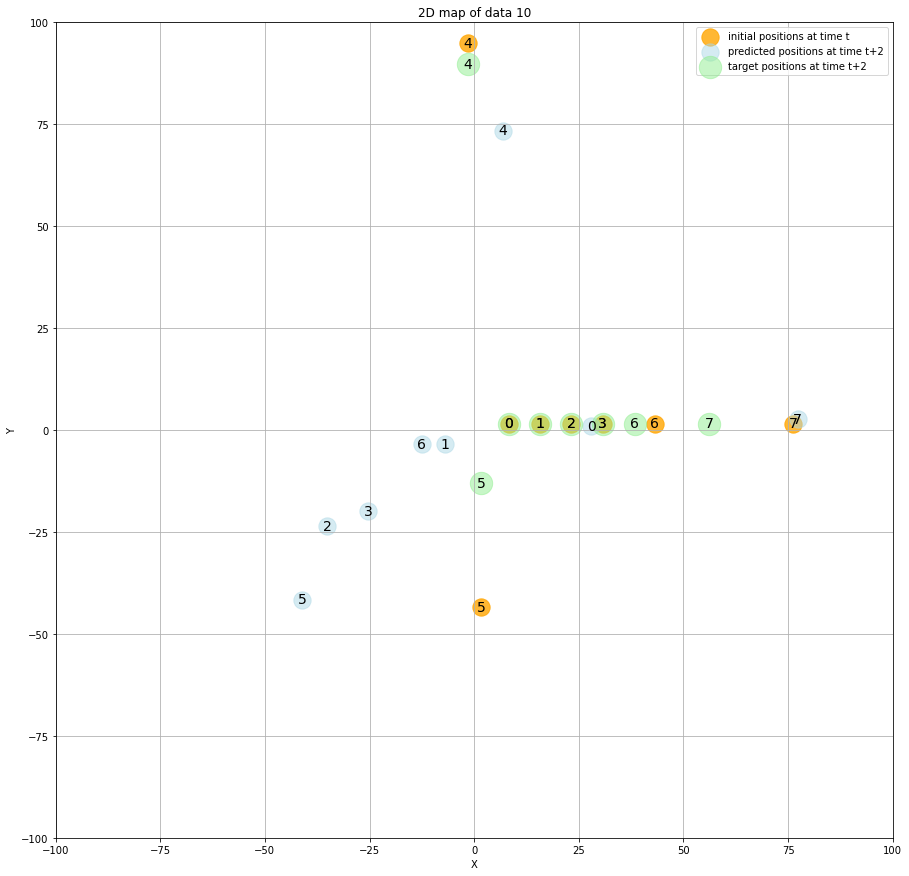

In [71]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_val,
                       start_from = max_ind,
                       end_at = max_ind+1,
                       edges_attr = True,
                       figsize = (15,15),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,
                       plotstat = True,

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )

# visualize best and worst results

In [42]:
sorted_losses = sorted(losses)

In [43]:
k = 10
TOP_RESULTS =[losses.index(l) for l in sorted_losses[:k]]
LOWEST_RESULTS =[losses.index(l) for l in sorted_losses[-k:]]


6

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [ 64.5400,   1.6000,   4.7124,  10.6700,   3.0000,   0.0000],
        [ 87.7400,   1.6000,   4.7124,   4.7700,   3.0000,   0.0000],
        [-94.9000,  -1.6000,   1.5708,   0.0000,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8, 

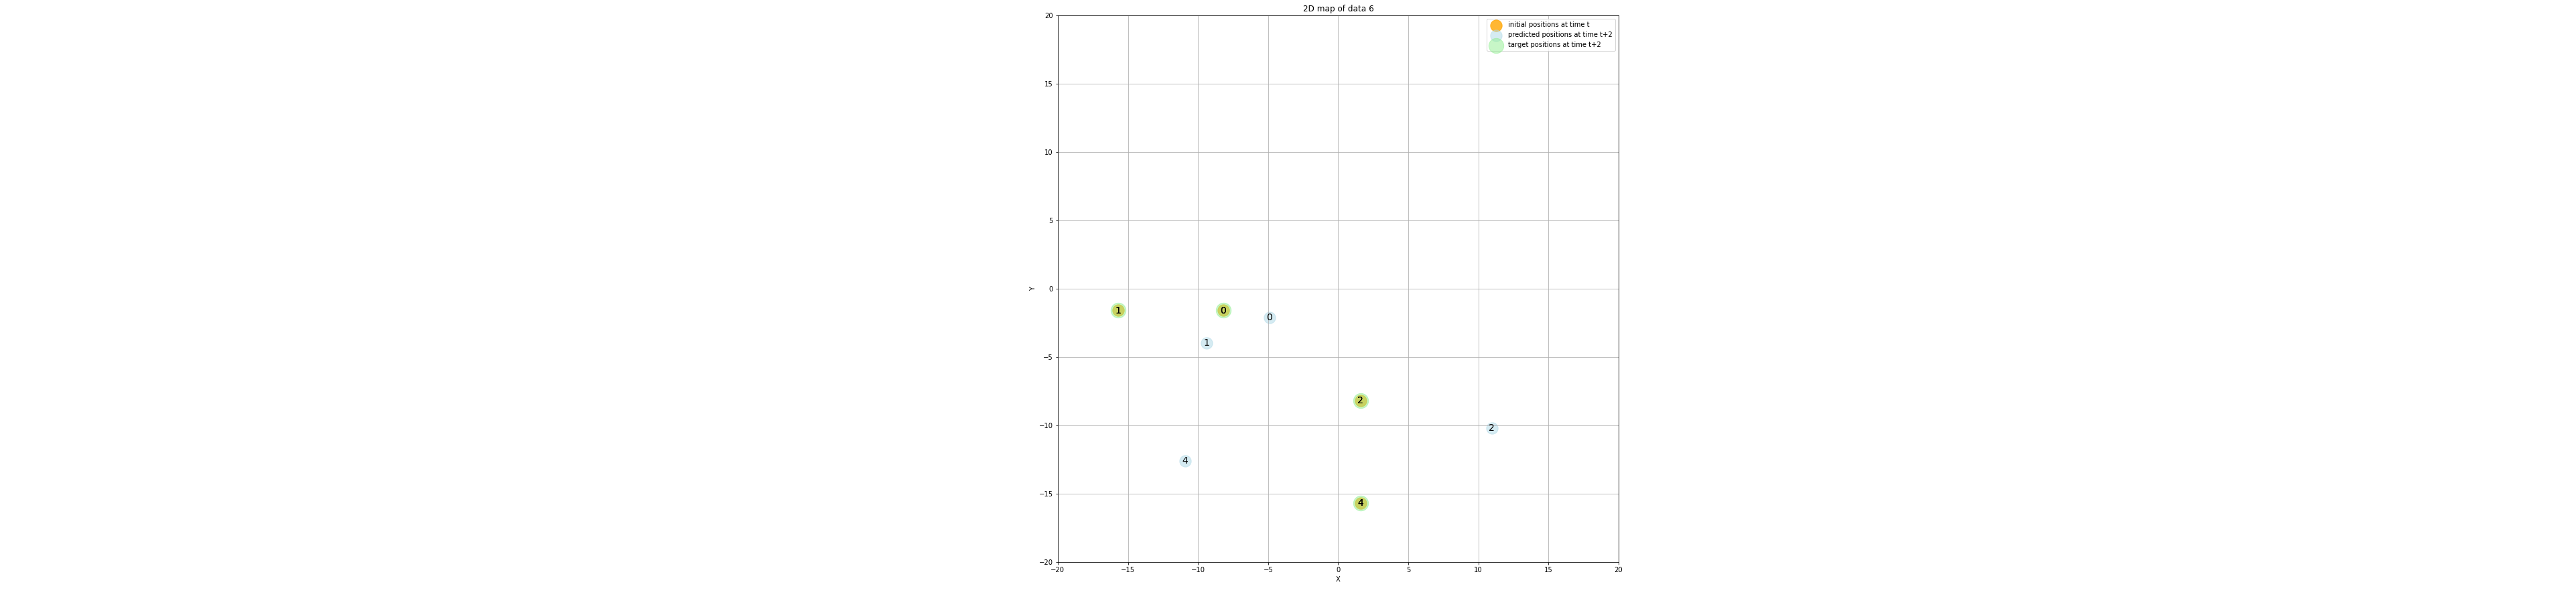


7

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  3.4100,   2.7500,   4.9506,   4.6900,   3.0000,   0.0000],
        [ 25.8400,   1.6000,   4.7124,  11.9000,   3.0000,   0.0000],
        [-49.5100,  -1.6000,   1.5708,  11.7300,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8, 

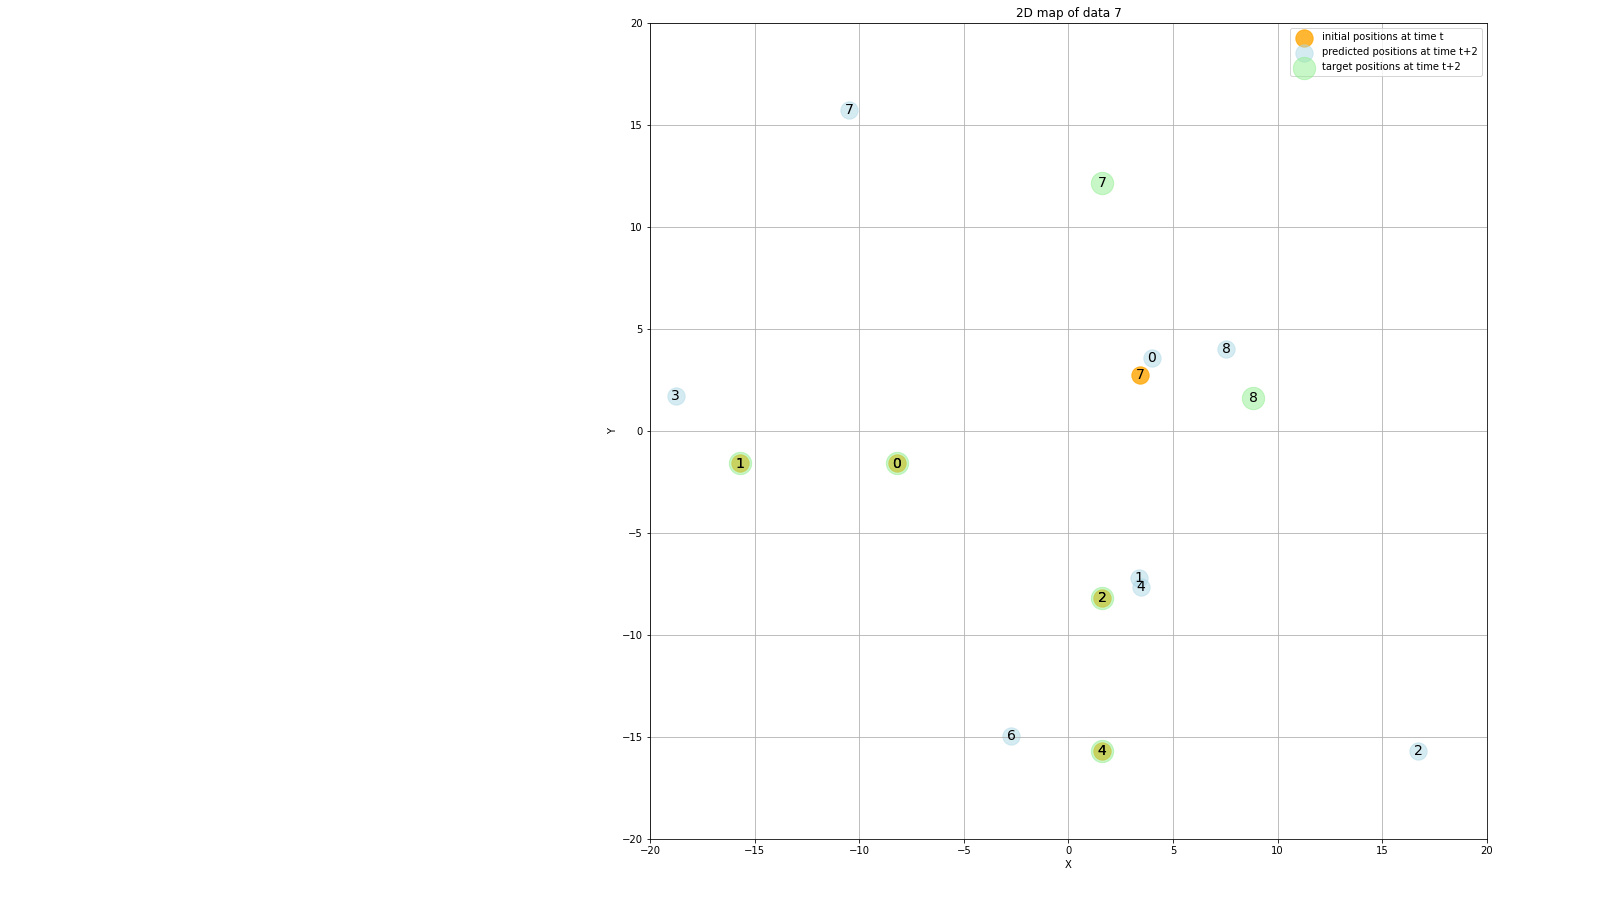


91

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  1.6100,   7.1500,   5.8872,   4.9400,   3.0000,   0.0000],
        [ 16.4300,   1.6000,   4.7124,   9.4000,   3.0000,   0.0000],
        [-42.0300,  -1.6000,   1.5708,   7.4800,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8,

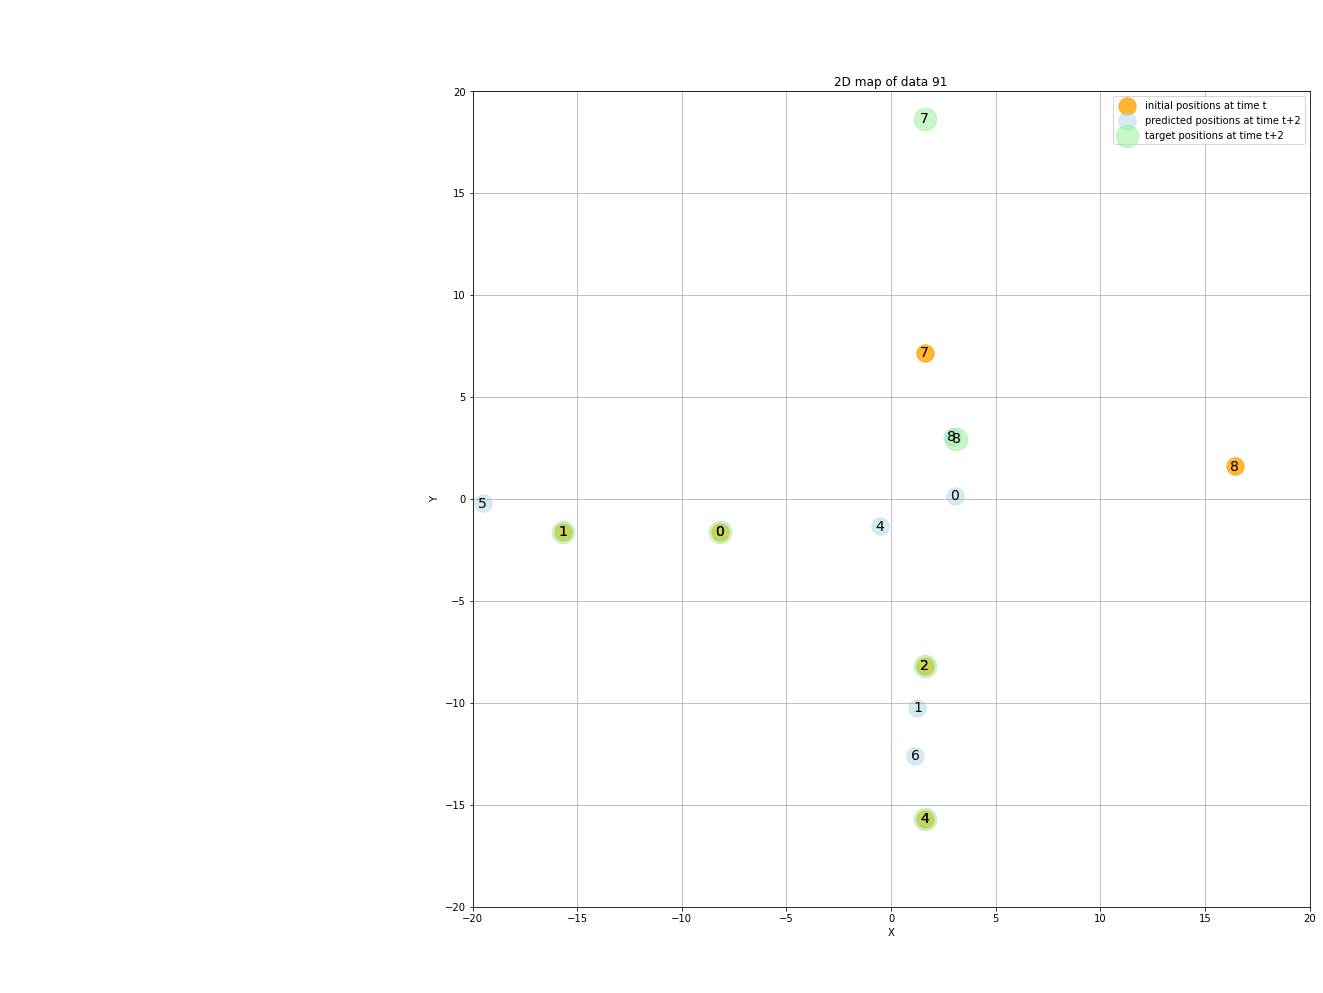


121

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,   9.5200,   6.1910,   5.0800,   3.0000,   0.0000],
        [ 11.3500,   1.6000,   4.7124,   3.0700,   1.0000,   0.0000],
        [-15.8400,  -1.6000,   1.5708,   1.0300,   0.0000,   0.0000],
        [  1.6000, -25.3400,   0.0000,  14.1000,   1.0000,   0.0000],
        [-54.8900,  -1.6000,   1.5708,  11.5000,   1.0000,   0.0000],
        [ 82.1700,   1.6000,   4.7124,   6.7800,   1.0000,   0.0000],
        [  1.6000, -88.9800,   0.0000,   4.1300,   1.0000,   0.0000]]),
edge_index=tensor([[0, 5, 4, 2, 6, 1, 3, 1, 0, 4, 4, 1, 2, 0, 0, 3, 1, 0, 1, 2, 2, 3, 0, 2,
         3, 0, 5, 1],
        [6, 6, 7, 7, 7, 6, 7, 3, 5, 5, 6, 4, 6, 3, 2, 6, 5, 4, 2, 5, 3, 5, 1, 4,
         4, 7, 7, 7]]),
edge_attr=tensor([ 1.8000,  1.6000,  1.9000,  1.6000,  1.5000,  1.8000,  1.7000,  8.7000,
         2.9000,  2.6000,  1.8000,  5.3000,  1.9000, 12.8000, 11.2000,  1.7000,
         2.7000,  5.8000, 12.7000,

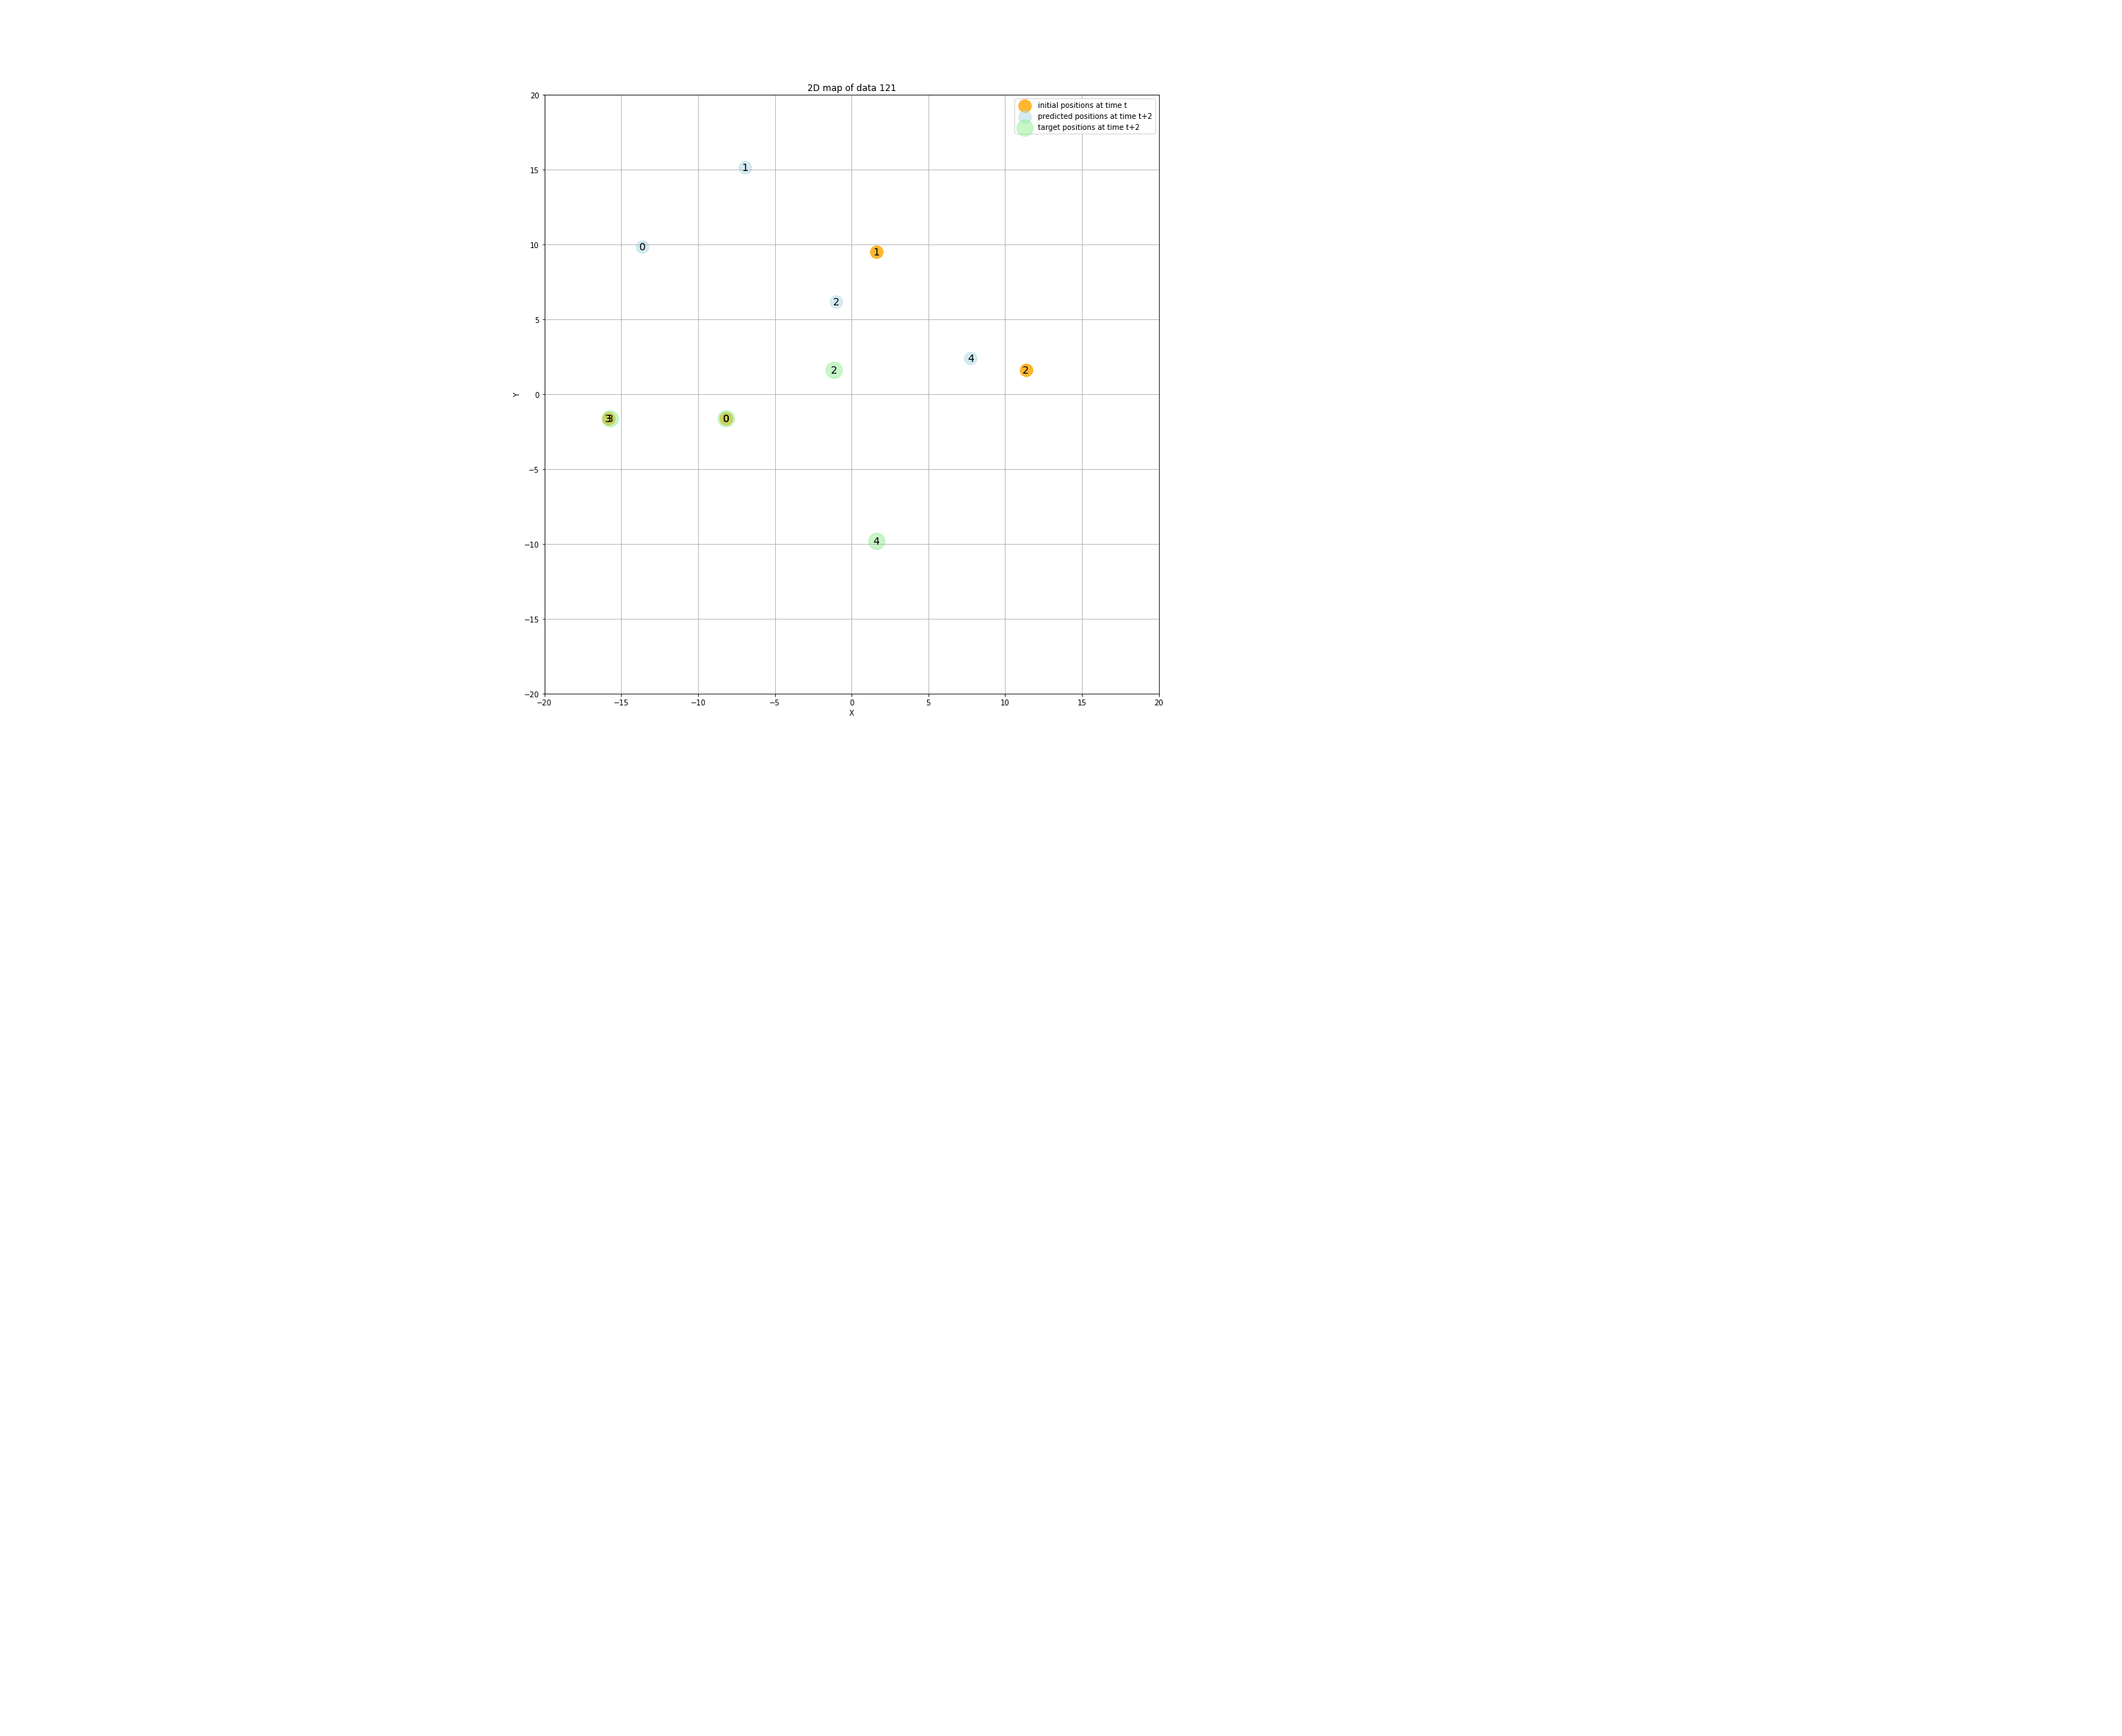


63

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  1.6000,  18.6300,   0.0000,   6.4700,   3.0000,   0.0000],
        [  3.1000,   2.9400,   4.9901,   6.0300,   3.0000,   0.0000],
        [-38.3400,  -1.6000,   1.5708,   0.2300,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8,

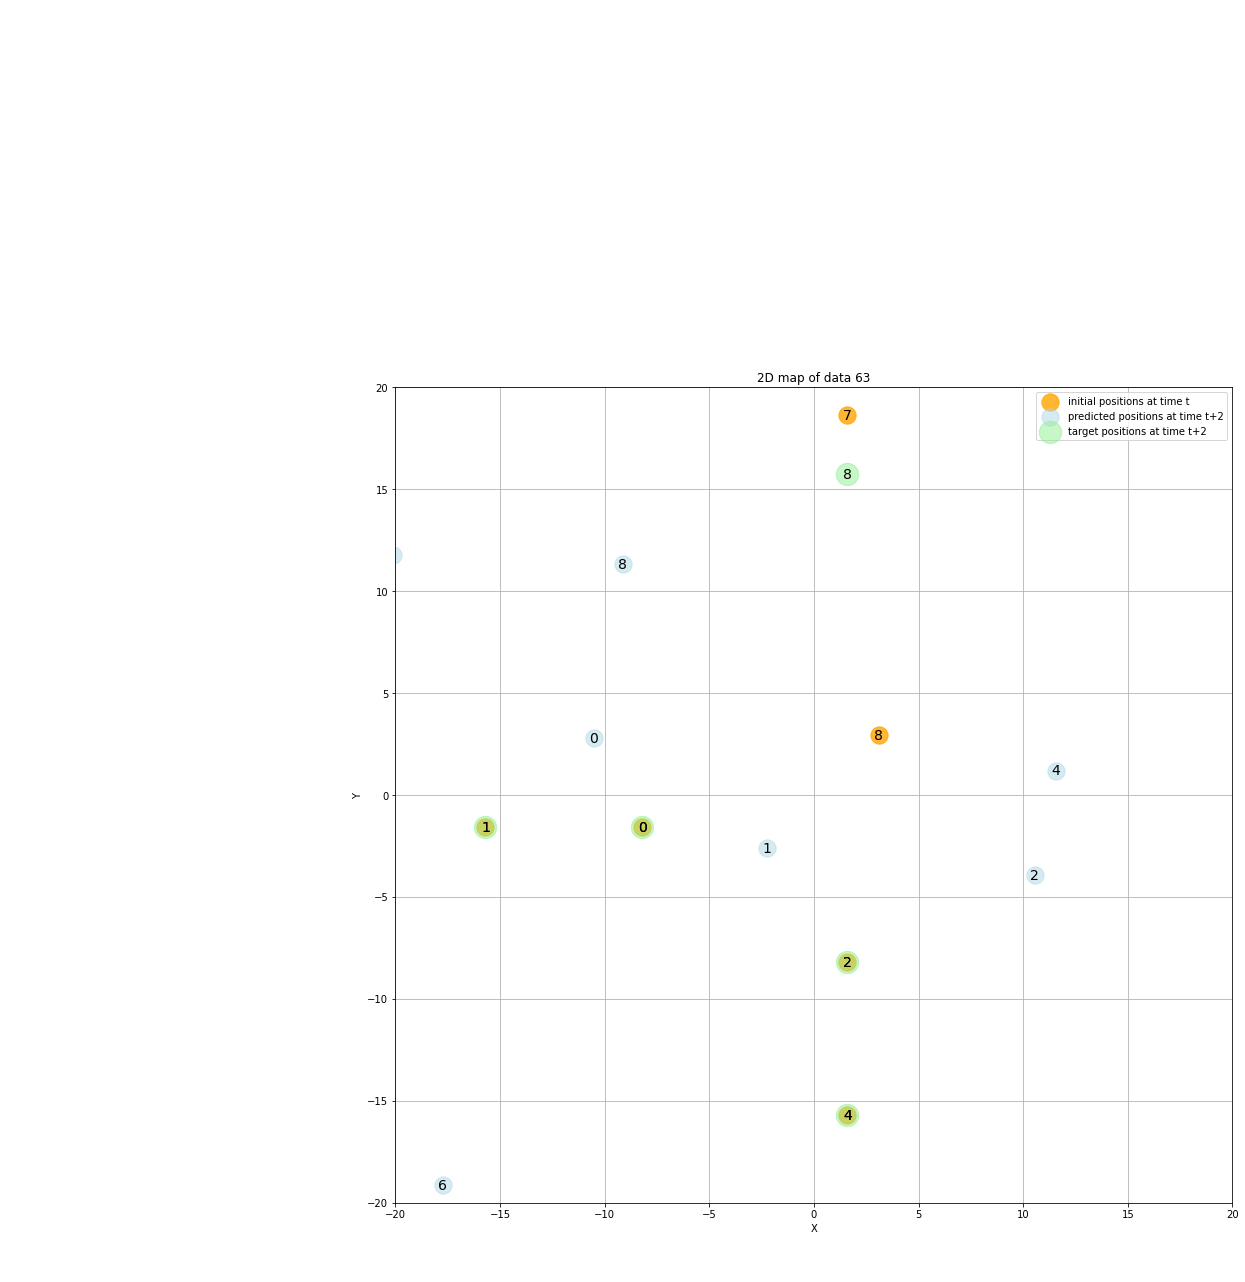


32

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  7.8500,   1.6000,   4.7124,   5.3800,   3.0000,   0.0000],
        [ 37.7400,   1.6000,   4.7124,  13.3100,   3.0000,   0.0000],
        [-61.2400,  -1.6000,   1.5708,  10.8600,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8,

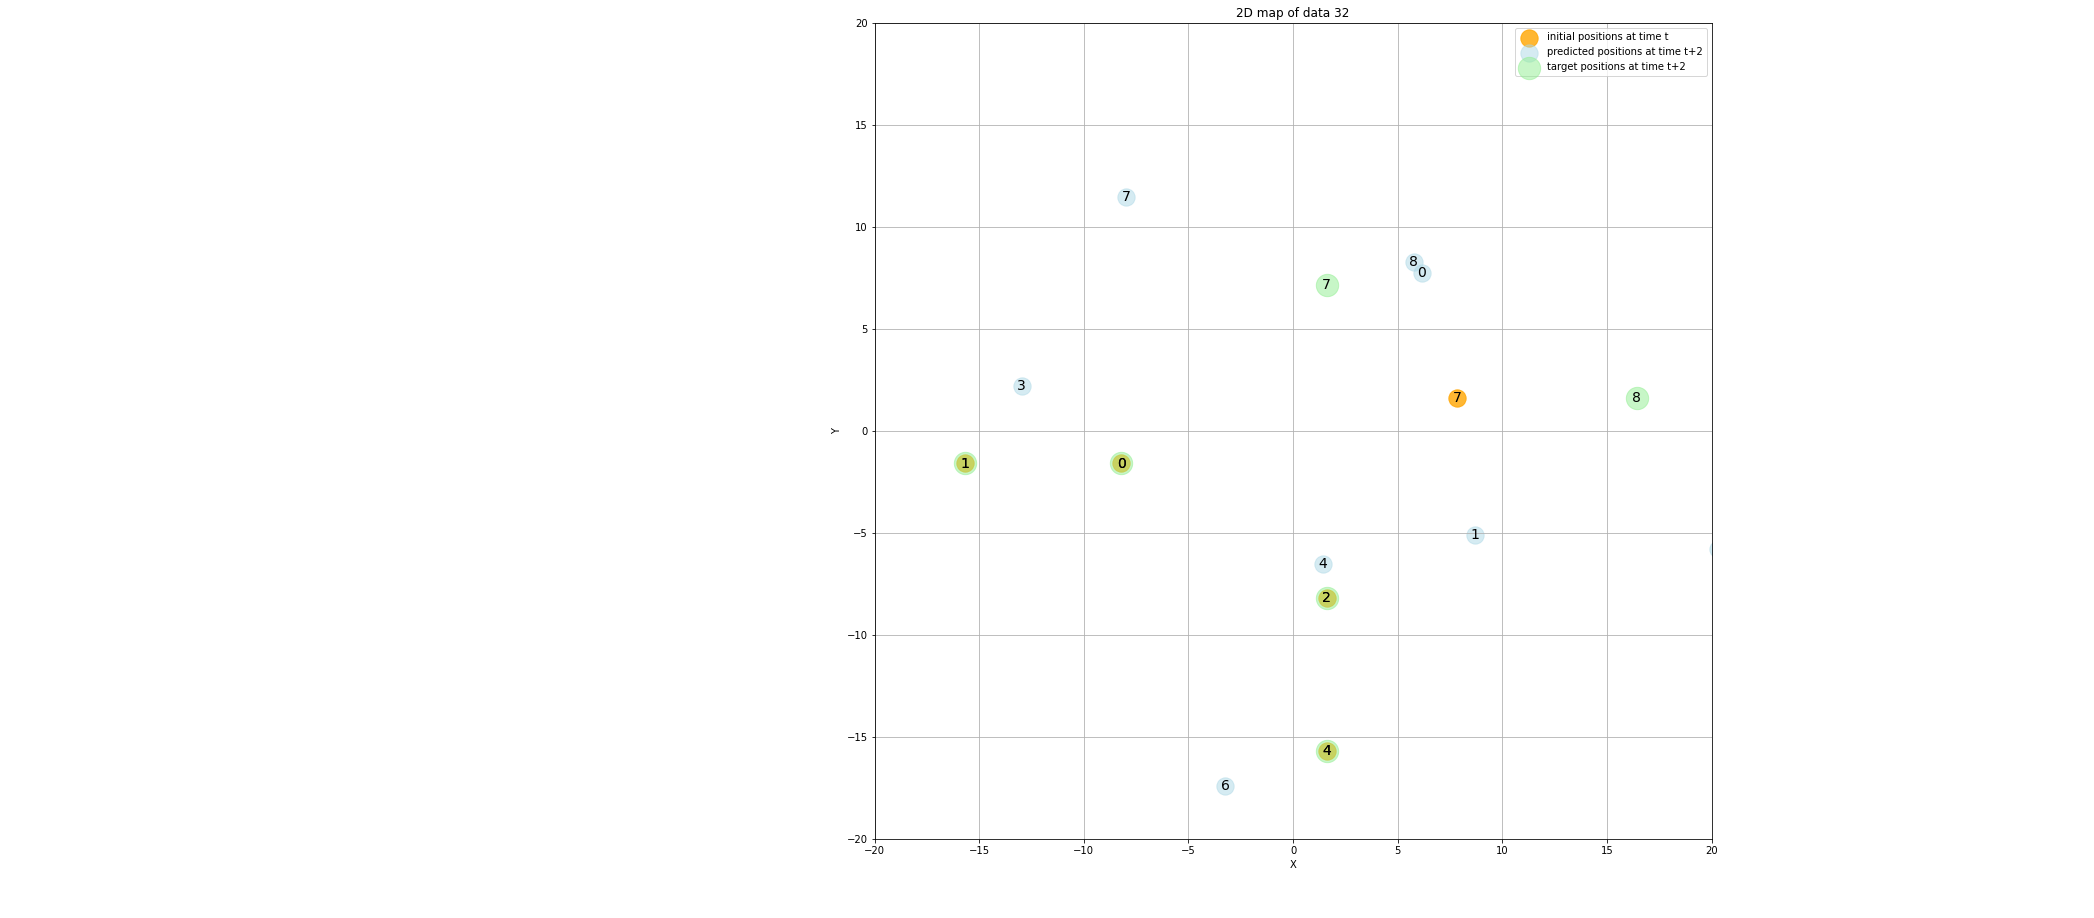


92

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [  1.6000,  12.1600,   6.2820,   5.0100,   3.0000,   0.0000],
        [  8.8300,   1.6000,   4.7124,   7.6000,   3.0000,   0.0000],
        [-38.5600,  -1.6000,   1.5708,   3.4700,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8,

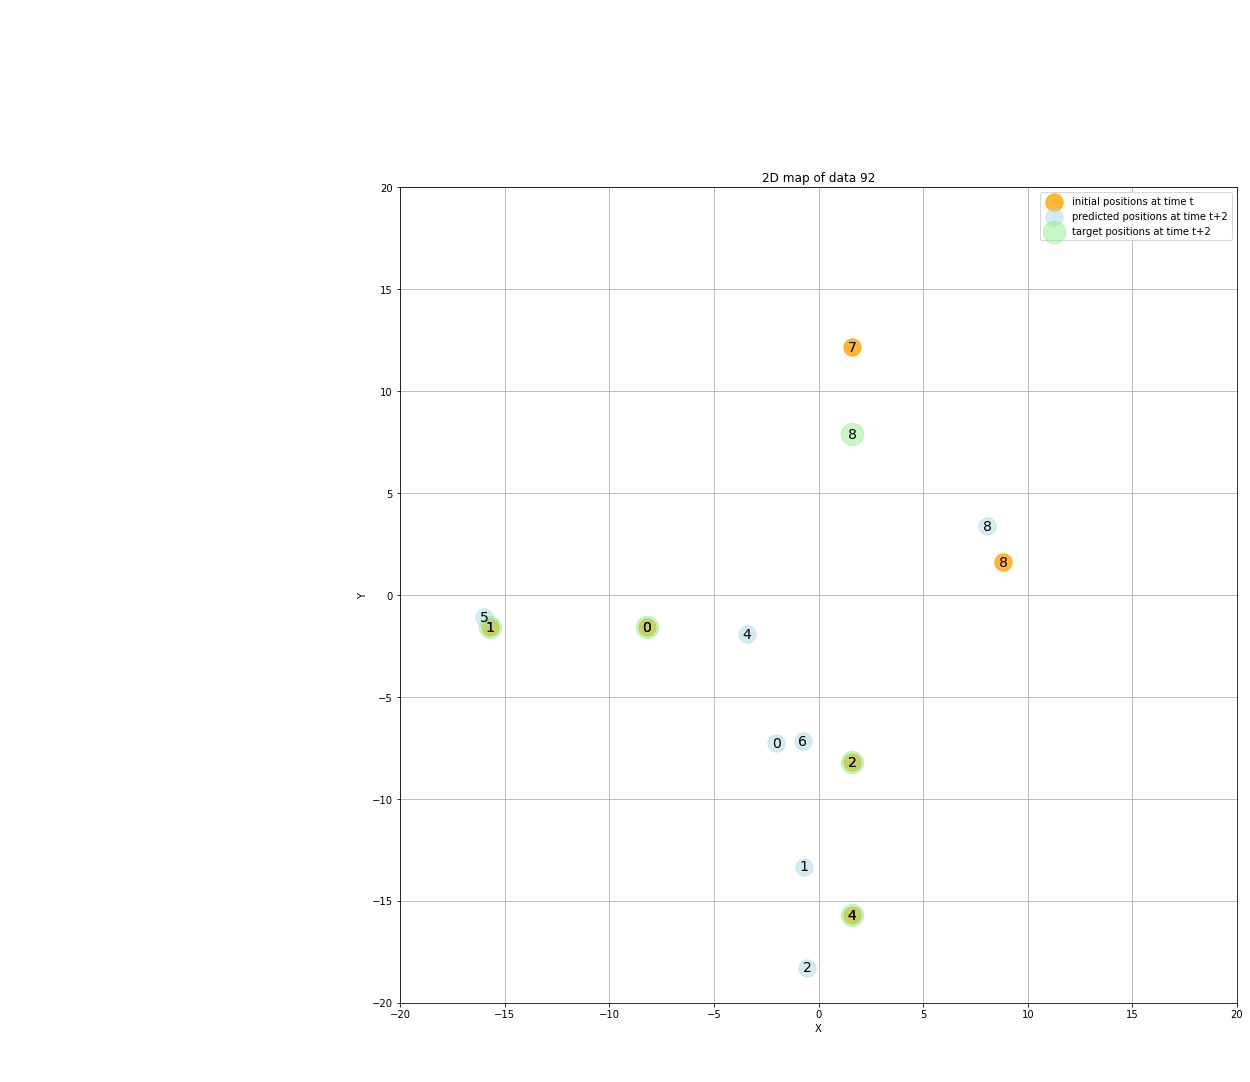


10

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -23.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [ 37.4900,   1.6000,   4.7124,  14.6800,   3.0000,   0.0000],
        [ 72.5300,   1.6000,   4.7124,   8.4900,   3.0000,   0.0000],
        [-87.7800,  -1.6000,   1.5708,   4.5600,   1.0000,   0.0000]]),
edge_index=tensor([[8, 6, 6, 7, 2, 5, 5, 6, 5, 7, 9, 5, 1, 8, 9, 7, 0, 2, 8, 9, 0, 7, 0, 6,
         7, 5, 6, 7, 9, 5, 1, 6, 7, 5, 8, 1, 0, 8, 3, 6, 5, 8, 6, 9, 5],
        [9, 3, 9, 3, 4, 3, 9, 1, 6, 1, 3, 1, 4, 0, 1, 2, 3, 3, 4, 2, 1, 9, 2, 0,
         0, 0, 4, 4, 0, 4, 3, 8, 8, 8,

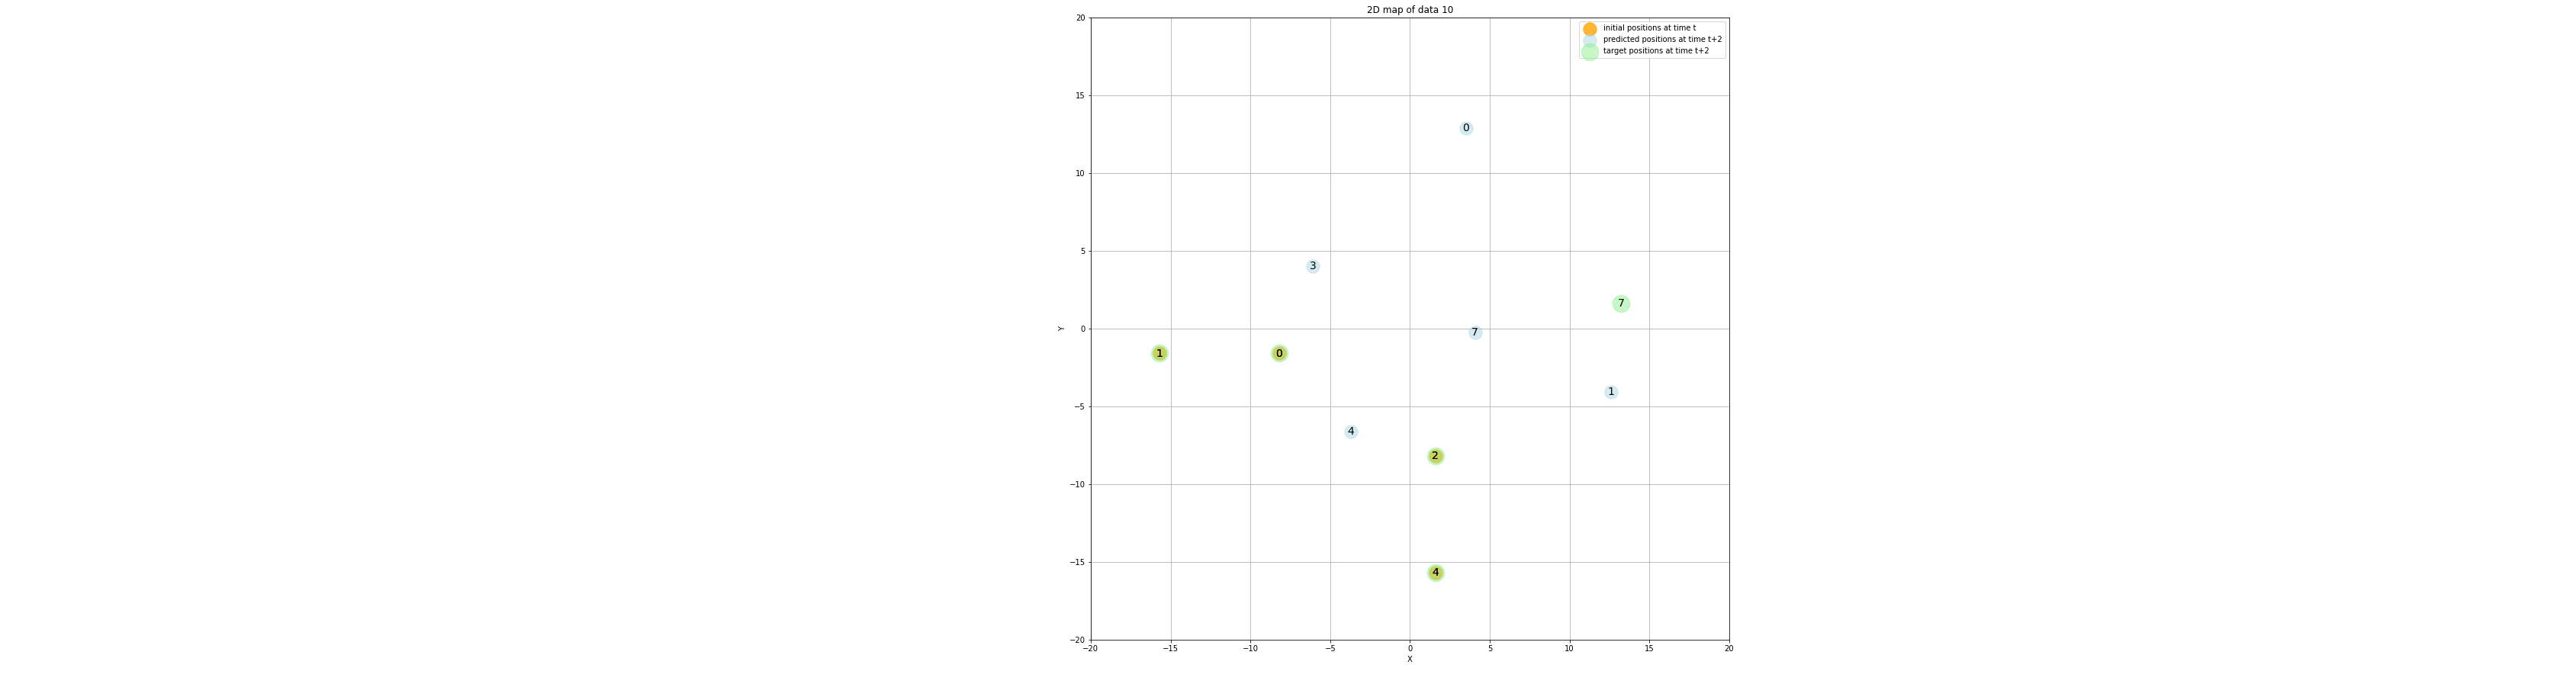


86

 INPUT
x=tensor([[ -2.2300,   1.6000,   4.7124,   5.0700,   1.0000,   0.0000],
        [ 11.1200,   1.6000,   4.7124,   2.8900,   3.0000,   0.0000],
        [ 21.6900,   1.6000,   4.7124,   1.5100,   1.0000,   0.0000],
        [ 30.7000,   1.6000,   4.7124,   0.0000,   3.0000,   0.0000],
        [ 38.2100,   1.6000,   4.7124,   0.0000,   3.0000,   0.0000],
        [ 45.7100,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ -8.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [ 53.5800,   1.6000,   4.7124,   0.3700,   3.0000,   0.0000],
        [  1.6000, -70.2100,   0.0000,   8.2300,   1.0000,   0.0000]]),
edge_index=tensor([[6, 8, 1, 1, 7, 1, 0, 3, 4, 3, 3, 2, 2, 1, 0, 0, 4, 2, 1, 5, 2, 6, 0, 1,
         4, 7, 0, 0, 0, 5, 3, 4, 3, 2, 2, 1, 1, 0, 5, 3, 5, 4, 0, 2, 6],
        [7, 9, 3, 2, 9, 4, 6, 5, 8, 9, 7, 3, 8, 8, 9, 7, 6, 5, 5, 8, 6, 8, 4, 6,
         5, 8, 3, 2, 1, 6, 4, 7, 8, 9,

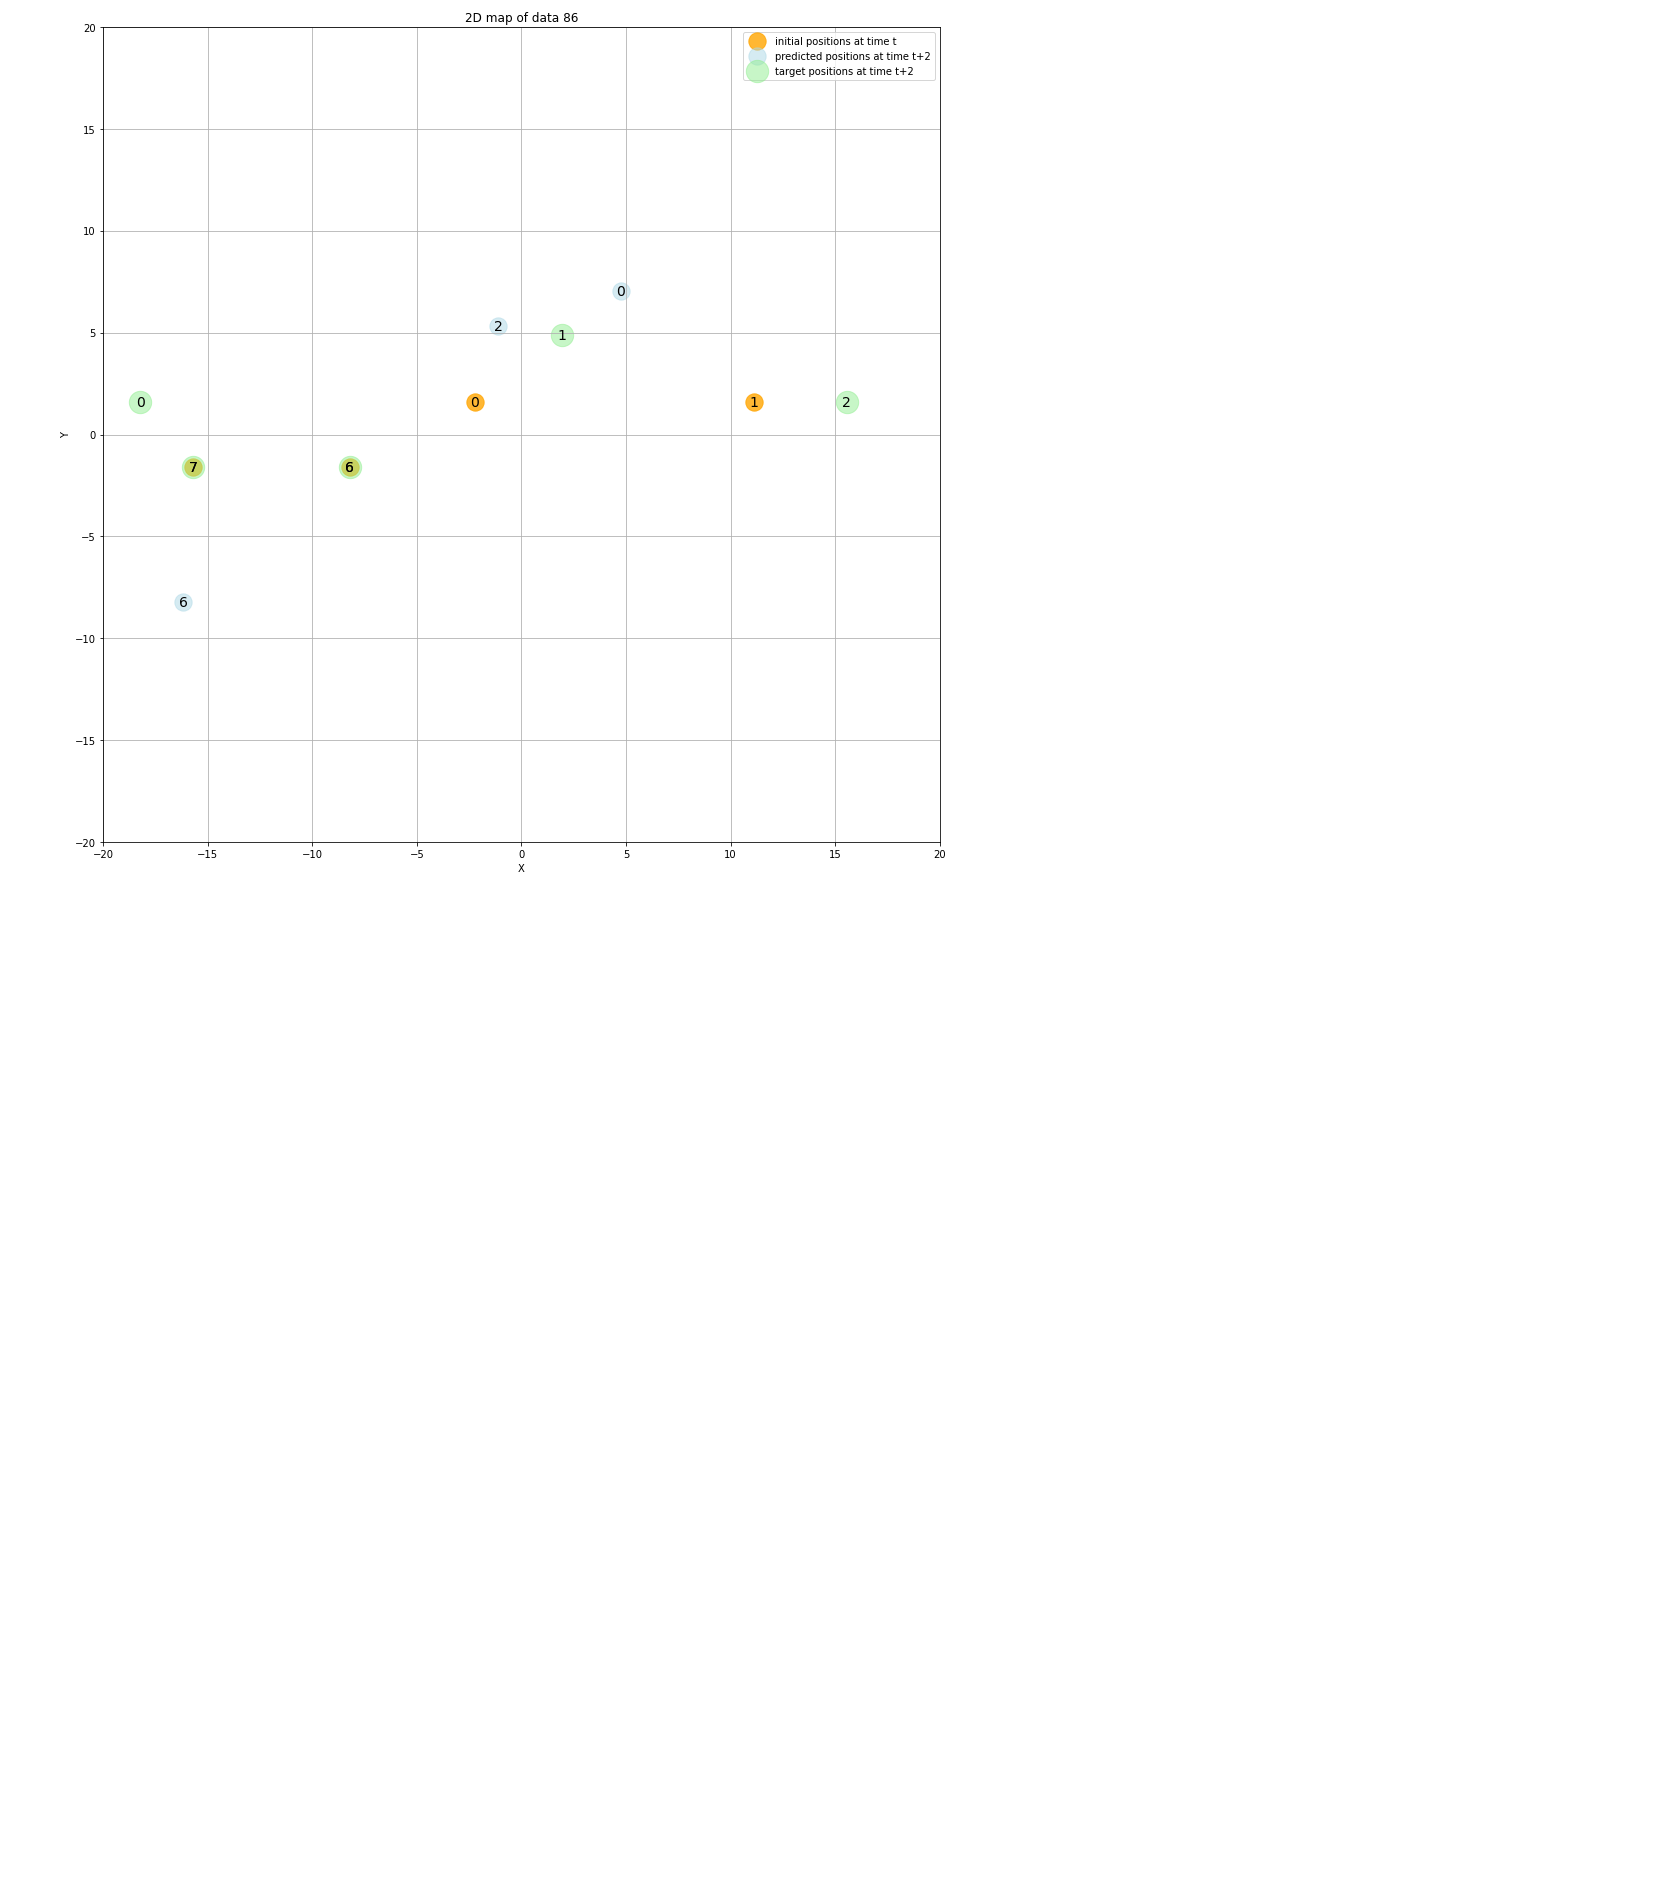


59

 INPUT
x=tensor([[ -8.2000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-23.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [  1.6000, -15.7000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-30.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000, -34.1300,   0.0000,  11.0700,   1.0000,   0.0000]]),
edge_index=tensor([[6, 2, 5, 6, 5, 5, 1, 0, 2, 0, 0, 6, 5, 6, 5, 1, 1, 0, 3, 6, 5],
        [3, 4, 3, 1, 6, 1, 4, 3, 3, 1, 2, 0, 0, 4, 4, 3, 2, 4, 4, 2, 2]]),
edge_attr=tensor([ 4.1000, 13.0000, 10.0000,  4.3000,  4.0000,  6.6000,  8.5000,  7.6000,
         6.2000, 13.0000, 16.2000,  4.4000,  5.5000,  5.6000,  4.7000, 11.0000,
         9.0000,  9.2000,  6.1000,  4.8000,  4.8000])


 TARGET
tensor([[ -8.2000,  -1.6000,   1.5708],
        [-15.7000,  -1.6000,   1.5708],
        [  1.6000,  -

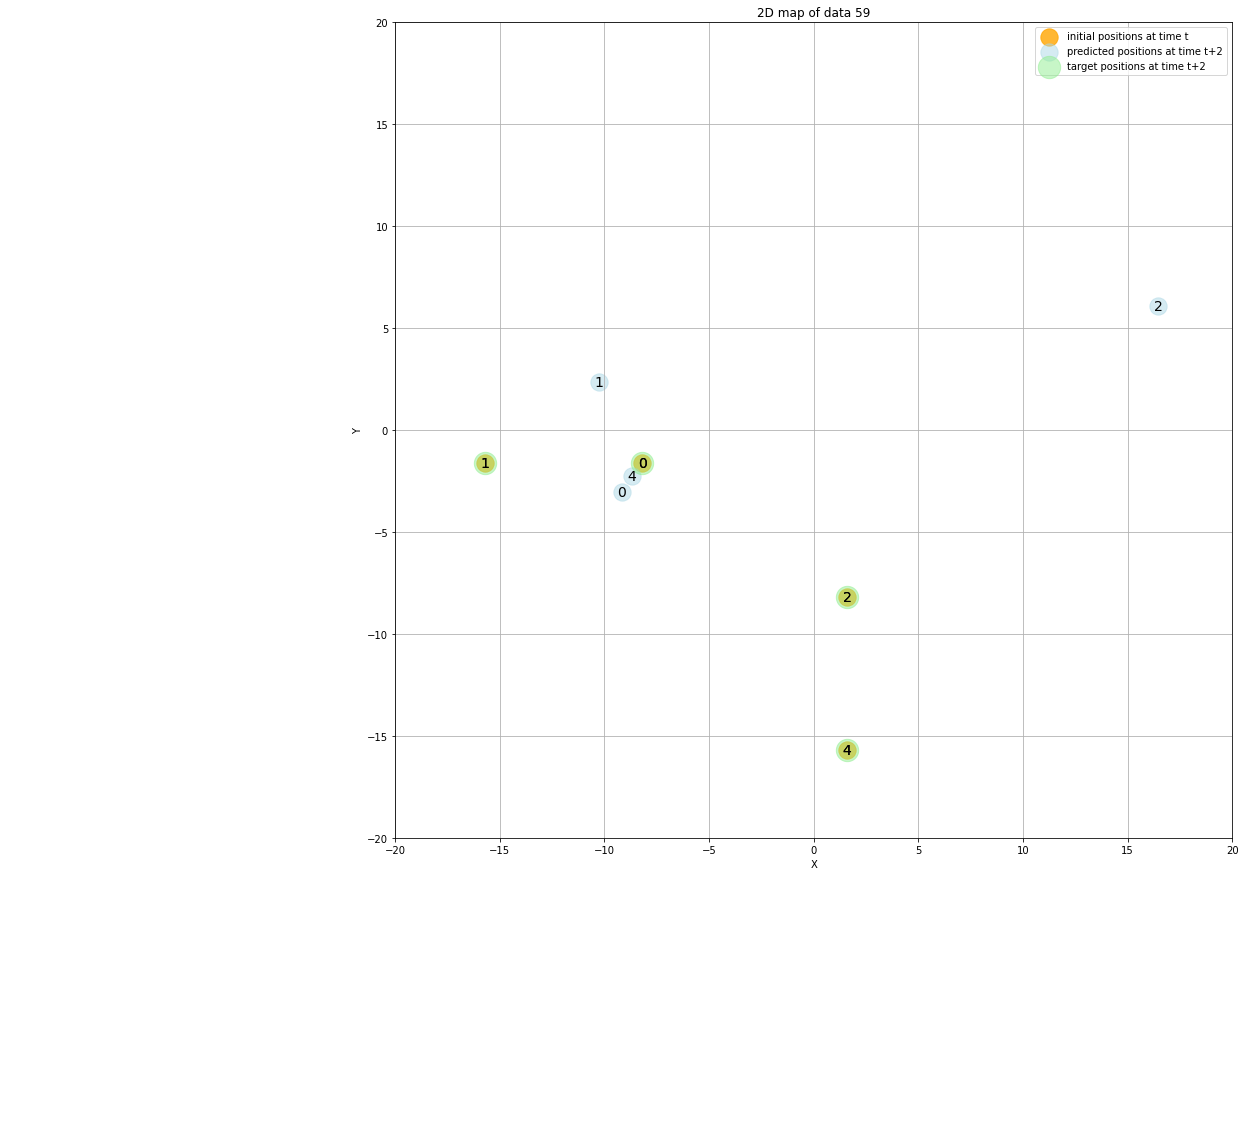

In [44]:
for min_ind in TOP_RESULTS:
    space = 20
    loss = plot_results_model(
                           load_model, 
                           dateset_train,
                           start_from = min_ind,
                           end_at = min_ind+1,
                           edges_attr = True,
                           figsize = (15,15),
                           plot_input = True,
                           plot_target = True,
                           plot_prediction = True,
                           plot_intention = False, 
                           title = None,

                           printstat = True,       
                           plotstat = True,
        
                           xlim = (-space,space),
                           ylim = (-space,space),
                           loss_stat = "L1"
                          )


124

 INPUT
x=tensor([[  1.6000,  62.4500,   0.0000,  14.3000,   3.0000,   0.0000],
        [-50.7400,   1.6000,   4.7124,  15.4700,   1.0000,   0.0000],
        [ -8.2000,  -1.6000,   1.5708,   0.0000,   1.0000,   1.0000],
        [-15.7000,  -1.6000,   1.5708,   0.0000,   0.0000,   1.0000],
        [  1.6000,  17.3400,   0.0000,   8.1000,   3.0000,   0.0000],
        [  1.6000,  -8.2000,   0.0000,   0.0000,   1.0000,   1.0000],
        [-33.1700,  -1.6000,   1.5708,  10.5400,   0.0000,   0.0000],
        [ -1.6000,  55.8400,   3.1416,  11.5500,   1.0000,   0.0000],
        [-89.8700,  -1.6000,   1.5708,   3.4800,   0.0000,   0.0000]]),
edge_index=tensor([[3, 2, 4, 3, 1, 2, 6, 3, 0, 0, 4, 5, 0, 1, 1, 2, 5, 2, 3, 0, 3, 1, 0, 6,
         0, 4, 0, 7, 4, 5, 1, 1, 1, 0, 2, 2],
        [7, 3, 5, 5, 6, 6, 7, 6, 8, 4, 8, 7, 2, 8, 4, 8, 6, 4, 8, 1, 4, 2, 7, 8,
         3, 7, 6, 8, 6, 8, 7, 5, 3, 5, 7, 5]]),
edge_attr=tensor([ 2.6000, 13.0000,  7.7000,  9.0000,  4.8000,  5.0000,  2.6000,  5.90

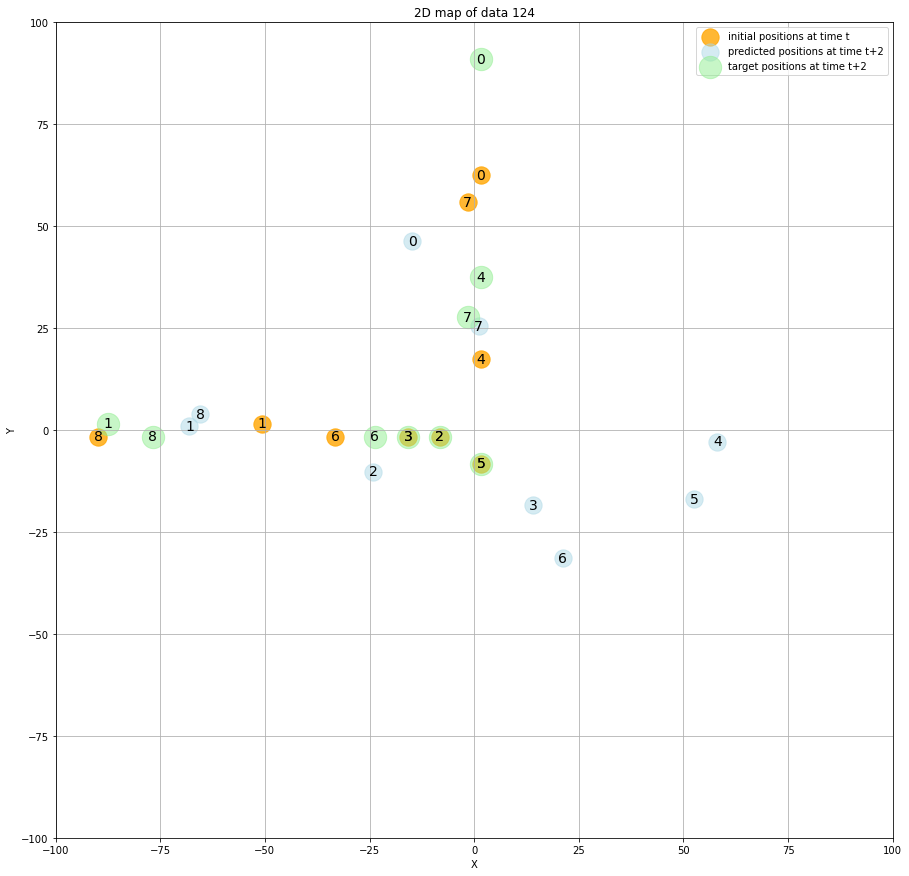


68

 INPUT
x=tensor([[  8.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 15.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ 23.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 30.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ -1.6000,  93.0500,   3.1416,   1.8500,   1.0000,   0.0000],
        [  1.6000, -29.3300,   0.0000,  14.1700,   1.0000,   0.0000],
        [ 38.8600,   1.6000,   4.7124,   4.3300,   3.0000,   0.0000],
        [ 66.8100,   1.6000,   4.7124,   9.3300,   1.0000,   0.0000]]),
edge_index=tensor([[1, 1, 0, 1, 3, 4, 3, 2, 5, 4, 3, 2, 1, 0, 2, 1, 0, 6, 0, 0, 0, 3, 4, 5,
         2, 1, 0, 2],
        [3, 2, 5, 6, 7, 7, 5, 3, 7, 5, 4, 7, 7, 4, 5, 5, 6, 7, 3, 2, 1, 6, 6, 6,
         4, 4, 7, 6]]),
edge_attr=tensor([ 6.6000, 11.0000,  5.0000,  4.8000,  2.9000,  1.5000,  4.5000, 10.0000,
         2.2000,  1.5000,  1.6000,  2.6000,  2.5000,  1.6000,  4.7000,  4.9000,
         4.2000,  3.3000,  5.5000, 

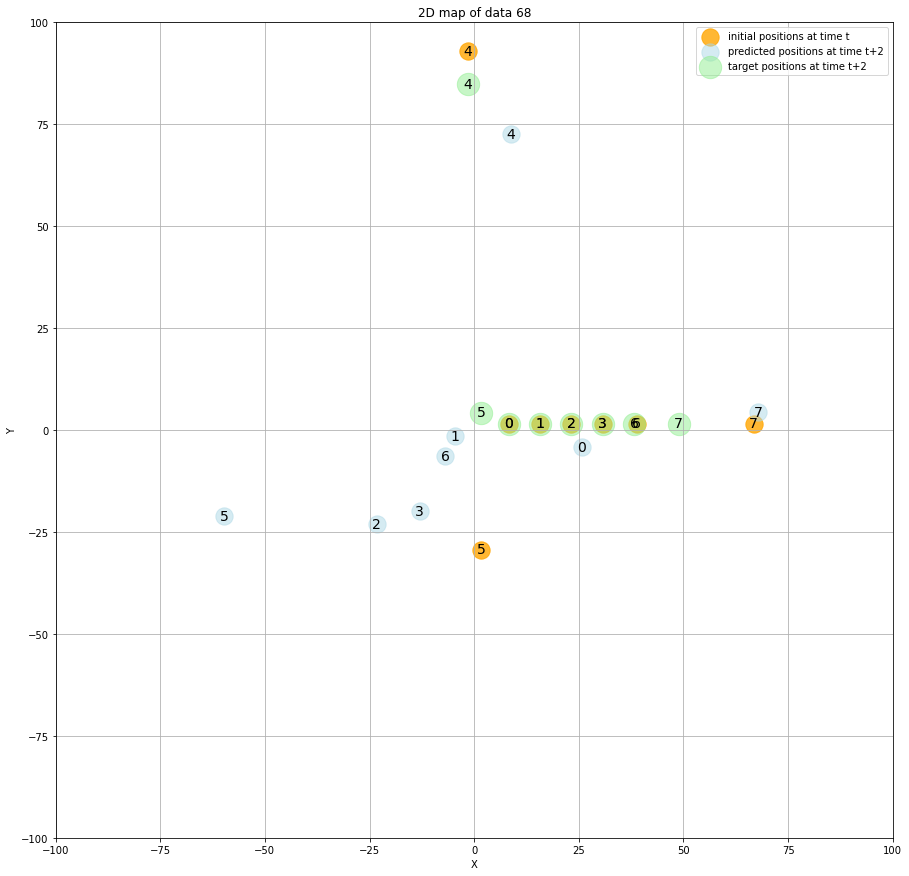


9

 INPUT
x=tensor([[ -1.6000, -50.7600,   3.1416,  18.9200,   1.0000,   0.0000],
        [  1.6000,  -9.1800,   0.0000,  16.7800,   1.0000,   0.0000],
        [-77.7400,  -1.6000,   1.5708,   7.2300,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.9000, 1.9000, 3.2000])


 TARGET
tensor([[ -1.6000, -89.3300,   3.1416],
        [  1.6000,  23.5700,   0.0000],
        [-56.8000,  -1.6000,   1.5708]])

 PREDICTION
tensor([[  2.4430, -59.2483,   0.1380],
        [ 73.7192,  18.6092,   3.1953],
        [-77.2219,   5.2985,   0.1826]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000, -50.7600,   3.1416,  18.9200,   1.0000,   0.0000],
        [  1.6000,  -9.1800,   0.0000,  16.7800,   1.0000,   0.0000],
        [-77.7400,  -1.6000,   1.5708,   7.2300,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.9000, 1.9000, 3.2000])


 TARGET
tensor([[ -1.6000, -89.3300,   3.1416],
        [  1.6000,  23.570

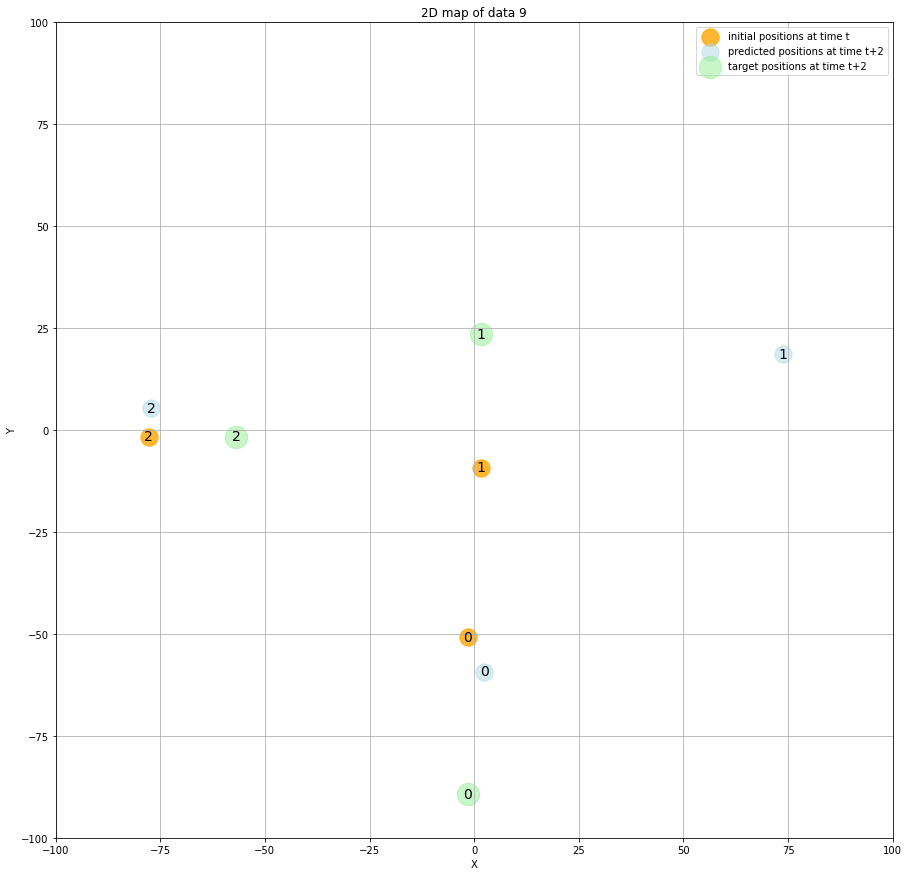


69

 INPUT
x=tensor([[  8.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 15.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ 23.2000,   1.6000,   4.7124,   0.0000,   1.0000,   1.0000],
        [ 30.7000,   1.6000,   4.7124,   0.0000,   3.0000,   1.0000],
        [ -1.6000,  94.9000,   3.1416,   0.0000,   1.0000,   0.0000],
        [  1.6000, -43.5000,   0.0000,  12.4100,   1.0000,   0.0000],
        [ 43.1800,   1.6000,   4.7124,   7.2400,   3.0000,   0.0000],
        [ 76.1400,   1.6000,   4.7124,   7.3100,   1.0000,   0.0000]]),
edge_index=tensor([[1, 1, 0, 1, 3, 4, 3, 2, 5, 4, 3, 2, 1, 0, 2, 1, 0, 6, 0, 0, 0, 3, 4, 5,
         2, 1, 0, 2],
        [3, 2, 5, 6, 7, 7, 5, 3, 7, 5, 4, 7, 7, 4, 5, 5, 6, 7, 3, 2, 1, 6, 6, 6,
         4, 4, 7, 6]]),
edge_attr=tensor([ 6.6000, 11.0000,  3.4000,  4.1000,  2.4000,  1.5000,  3.2000, 10.0000,
         1.9000,  1.5000,  1.6000,  2.2000,  2.1000,  1.6000,  3.3000,  3.4000,
         3.7000,  2.8000,  5.5000, 

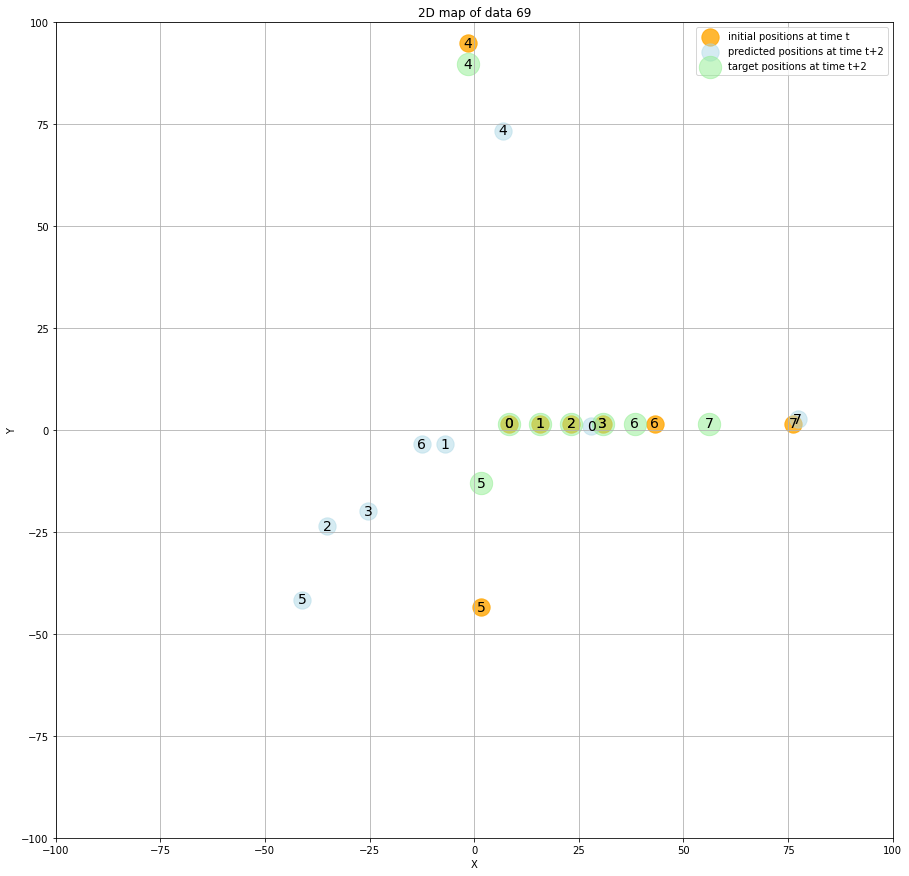


74

 INPUT
x=tensor([[ -1.6000,  39.0800,   3.1416,  13.8600,   1.0000,   0.0000],
        [  1.6000, -74.4600,   0.0000,   8.2100,   1.0000,   0.0000]]),
edge_index=tensor([[0],
        [1]]),
edge_attr=tensor([1.7000])


 TARGET
tensor([[ -1.6000,   5.6100,   3.1416],
        [  1.6000, -53.7600,   0.0000]])

 PREDICTION
tensor([[  5.0358,  71.6588,   0.4070],
        [ -4.2151, -72.6433,   0.8530]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000,  39.0800,   3.1416,  13.8600,   1.0000,   0.0000],
        [  1.6000, -74.4600,   0.0000,   8.2100,   1.0000,   0.0000]]),
edge_index=tensor([[0],
        [1]]),
edge_attr=tensor([1.7000])


 TARGET
tensor([[ -1.6000,   5.6100,   3.1416],
        [  1.6000, -53.7600,   0.0000]])

 PREDICTION
tensor([[  5.0358,  71.6588,   0.4070],
        [ -4.2151, -72.6433,   0.8530]], grad_fn=<AddBackward0>)
loss_value=16.828433990478516
loss_value=16.828433990478516


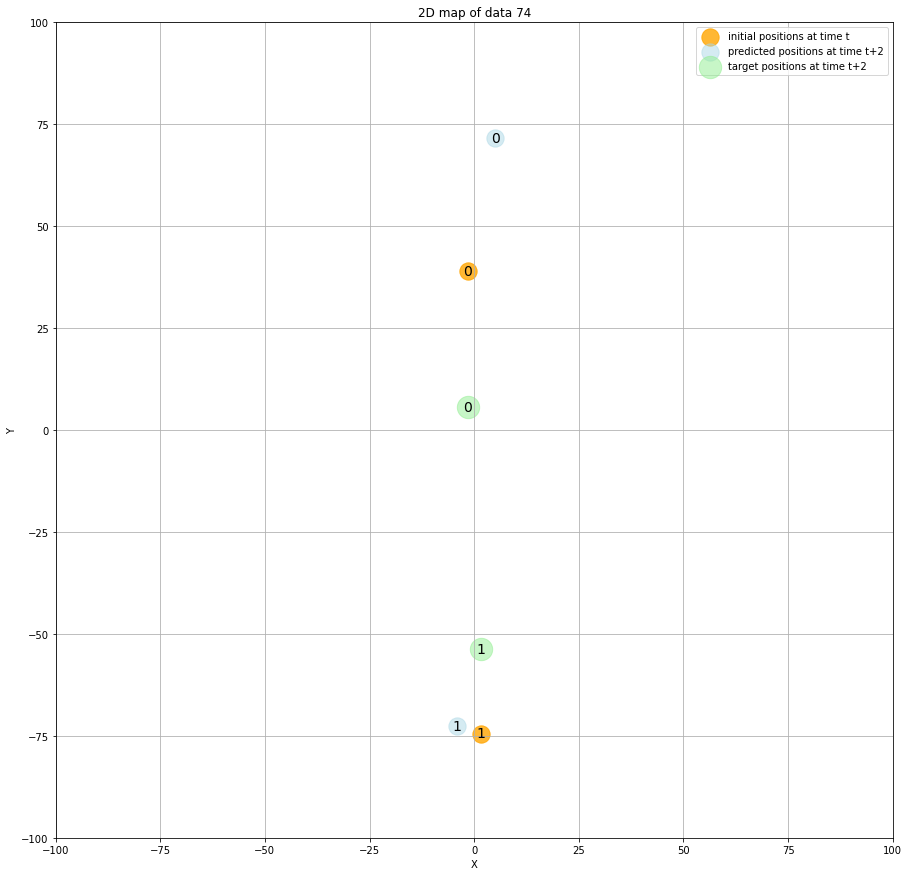


118

 INPUT
x=tensor([[ -1.6000, -12.7300,   3.1416,  18.3500,   1.0000,   0.0000],
        [  1.6000, -40.6300,   0.0000,  13.1200,   1.0000,   0.0000],
        [-90.0600,  -1.6000,   1.5708,   3.4400,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.6000, 1.7000, 4.3000])


 TARGET
tensor([[ -1.6000, -50.7600,   3.1416],
        [  1.6000,  -9.1800,   0.0000],
        [-77.7400,  -1.6000,   1.5708]])

 PREDICTION
tensor([[ 23.3304,   3.2474,   5.6288],
        [ 73.5062,  -6.3374,  -0.5548],
        [-76.7481,   5.6434,   0.2221]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000, -12.7300,   3.1416,  18.3500,   1.0000,   0.0000],
        [  1.6000, -40.6300,   0.0000,  13.1200,   1.0000,   0.0000],
        [-90.0600,  -1.6000,   1.5708,   3.4400,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.6000, 1.7000, 4.3000])


 TARGET
tensor([[ -1.6000, -50.7600,   3.1416],
        [  1.6000,  -9.1

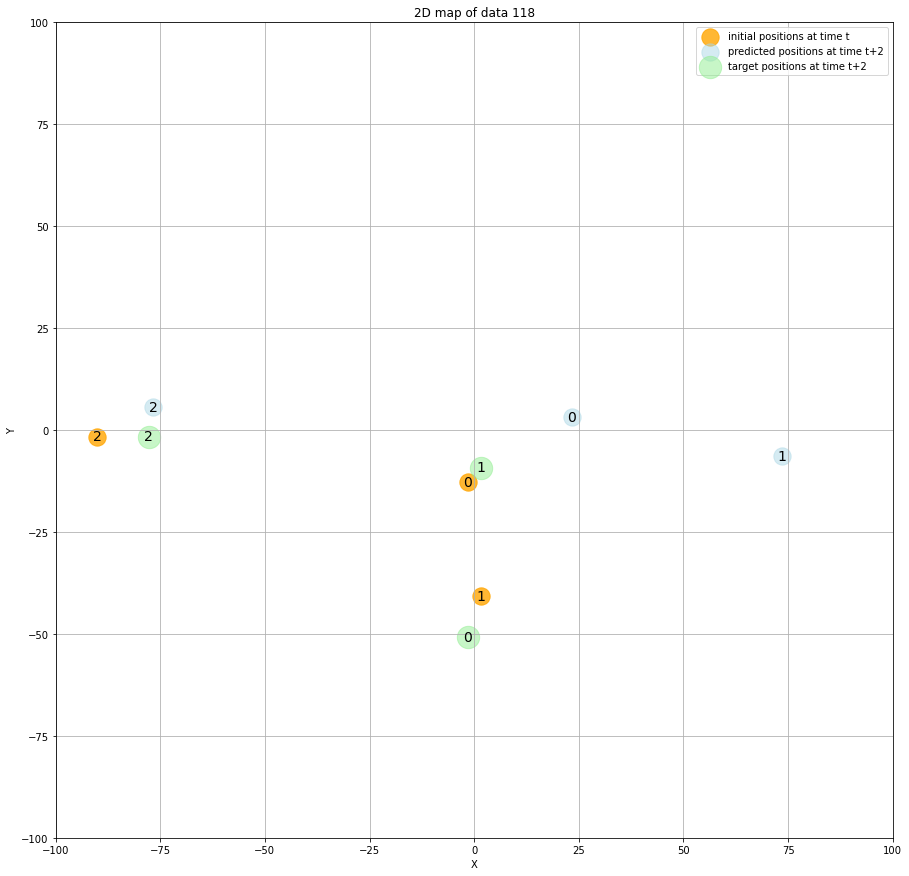


98

 INPUT
x=tensor([[-8.2000e+00, -1.6000e+00,  1.5708e+00,  1.0000e-02,  0.0000e+00,
          1.0000e+00],
        [ 2.9580e+01,  1.6000e+00,  4.7124e+00,  1.4450e+01,  3.0000e+00,
          0.0000e+00],
        [ 7.4060e+01,  1.6000e+00,  4.7124e+00,  8.2200e+00,  1.0000e+00,
          0.0000e+00]]),
edge_index=tensor([[0, 1, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.9000, 2.4000, 4.7000])


 TARGET
tensor([[-8.2000, -1.6000,  1.5708],
        [11.0800,  1.6000,  4.7124],
        [50.3400,  1.6000,  4.7124]])

 PREDICTION
tensor([[-72.2667,   0.4321,  -1.0209],
        [-47.1125,  -7.8821,   3.0292],
        [ 83.1885,   2.9919,   2.3420]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[-8.2000e+00, -1.6000e+00,  1.5708e+00,  1.0000e-02,  0.0000e+00,
          1.0000e+00],
        [ 2.9580e+01,  1.6000e+00,  4.7124e+00,  1.4450e+01,  3.0000e+00,
          0.0000e+00],
        [ 7.4060e+01,  1.6000e+00,  4.7124e+00,  8.2200e+00,  1.0000e+00,
          0.0000e+00]]),
edge_index=tenso

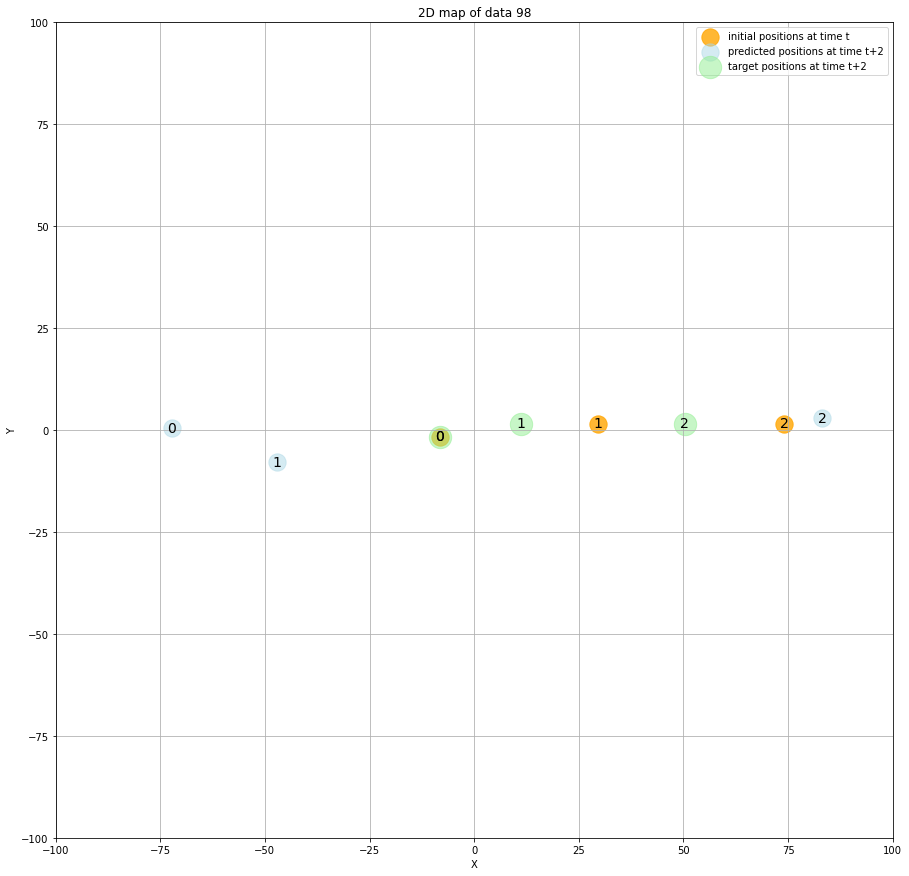


53

 INPUT
x=tensor([[ -1.6000,  23.2200,   3.1416,  15.8600,   1.0000,   0.0000],
        [  1.6000, -64.8100,   0.0000,   9.6500,   1.0000,   0.0000],
        [-94.9000,  -1.6000,   1.5708,   0.0000,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.5000, 1.6000, 2.1000])


 TARGET
tensor([[ -1.6000, -12.7300,   3.1416],
        [  1.6000, -40.6300,   0.0000],
        [-90.0600,  -1.6000,   1.5708]])

 PREDICTION
tensor([[ 23.9992,  61.0867,  -0.6468],
        [ 19.4557, -63.4129,  -2.8435],
        [-69.0926,   6.3822,  -0.4390]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000,  23.2200,   3.1416,  15.8600,   1.0000,   0.0000],
        [  1.6000, -64.8100,   0.0000,   9.6500,   1.0000,   0.0000],
        [-94.9000,  -1.6000,   1.5708,   0.0000,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.5000, 1.6000, 2.1000])


 TARGET
tensor([[ -1.6000, -12.7300,   3.1416],
        [  1.6000, -40.63

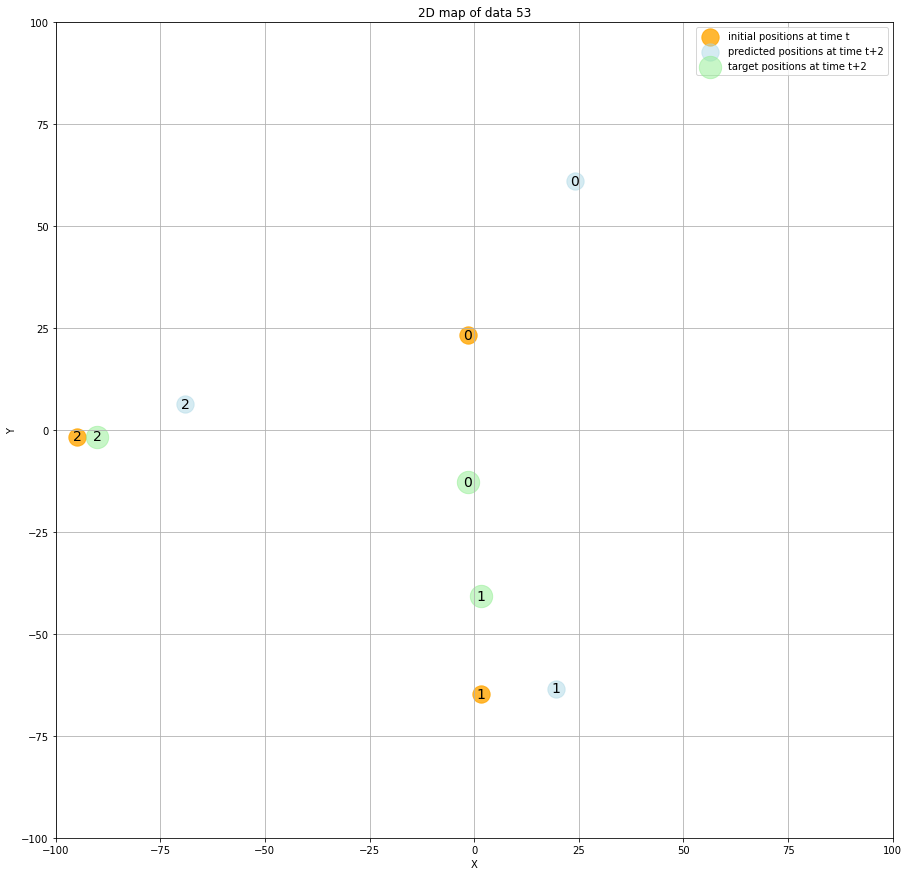


75

 INPUT
x=tensor([[-8.2000, -1.6000,  1.5708,  0.0000,  0.0000,  1.0000],
        [18.0800,  1.6000,  4.7124, 11.5000,  3.0000,  0.0000],
        [63.4000,  1.6000,  4.7124, 10.6600,  1.0000,  0.0000]]),
edge_index=tensor([[0, 1, 0],
        [2, 2, 1]]),
edge_attr=tensor([2.3000, 2.7000, 7.4000])


 TARGET
tensor([[-8.2000, -1.6000,  1.5708],
        [ 8.5800,  1.6000,  4.7124],
        [35.7900,  1.6000,  4.7124]])

 PREDICTION
tensor([[-51.2760,   5.7195,  -0.3650],
        [-55.6123, -10.0630,   3.5434],
        [ 80.7175,   2.5462,   2.1914]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[-8.2000, -1.6000,  1.5708,  0.0000,  0.0000,  1.0000],
        [18.0800,  1.6000,  4.7124, 11.5000,  3.0000,  0.0000],
        [63.4000,  1.6000,  4.7124, 10.6600,  1.0000,  0.0000]]),
edge_index=tensor([[0, 1, 0],
        [2, 2, 1]]),
edge_attr=tensor([2.3000, 2.7000, 7.4000])


 TARGET
tensor([[-8.2000, -1.6000,  1.5708],
        [ 8.5800,  1.6000,  4.7124],
        [35.7900,  1.6000,  4.7124]]

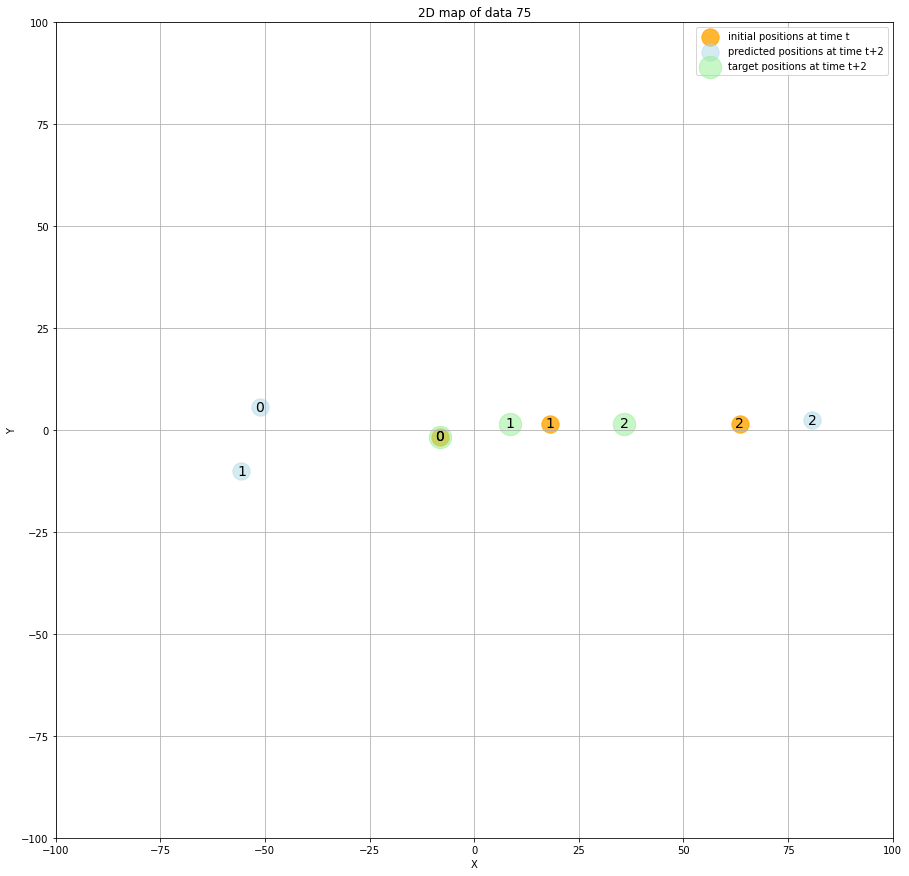


119

 INPUT
x=tensor([[ -1.6000,   5.6100,   3.1416,  17.6100,   1.0000,   0.0000],
        [  1.6000, -53.7600,   0.0000,  11.0600,   1.0000,   0.0000],
        [-93.5000,  -1.6000,   1.5708,   1.4000,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.6000, 1.6000, 2.7000])


 TARGET
tensor([[ -1.6000, -31.8400,   3.1416],
        [  1.6000, -25.9600,   0.0000],
        [-84.9700,  -1.6000,   1.5708]])

 PREDICTION
tensor([[ 20.8959,  44.3477,   4.8227],
        [ 36.6972, -48.8618,  -4.1455],
        [-71.1713,   6.8910,  -0.8069]], grad_fn=<AddBackward0>)

 INPUT
x=tensor([[ -1.6000,   5.6100,   3.1416,  17.6100,   1.0000,   0.0000],
        [  1.6000, -53.7600,   0.0000,  11.0600,   1.0000,   0.0000],
        [-93.5000,  -1.6000,   1.5708,   1.4000,   0.0000,   0.0000]]),
edge_index=tensor([[1, 0, 0],
        [2, 2, 1]]),
edge_attr=tensor([1.6000, 1.6000, 2.7000])


 TARGET
tensor([[ -1.6000, -31.8400,   3.1416],
        [  1.6000, -25.9

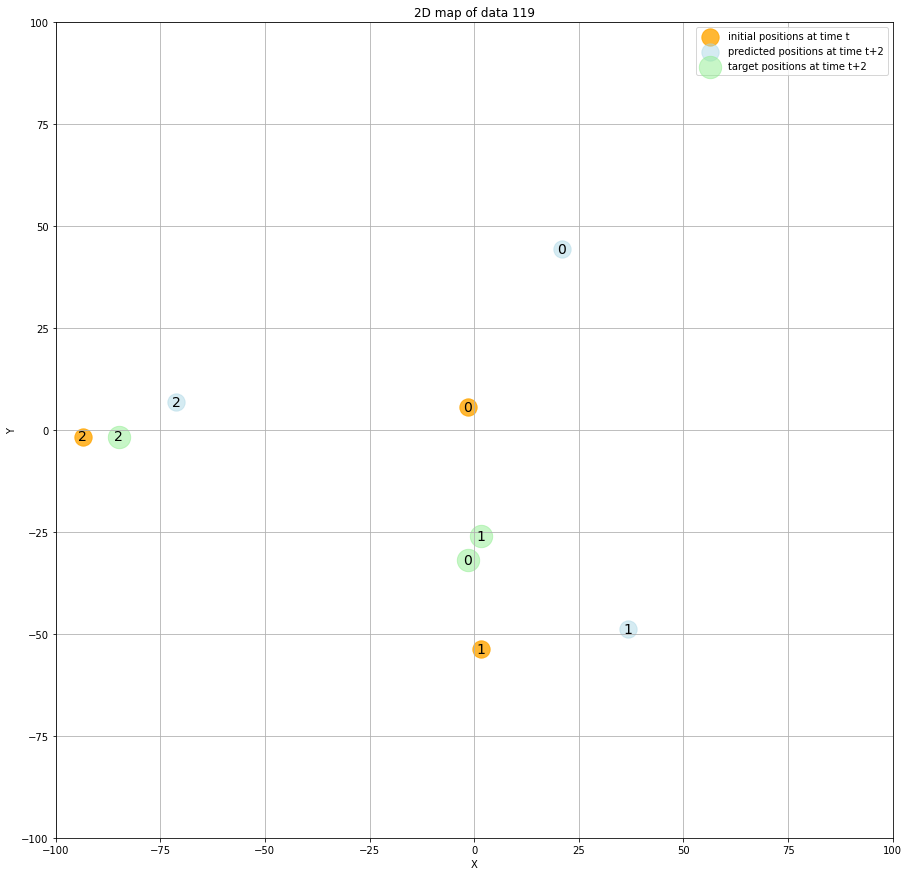

In [45]:
for max_ind in LOWEST_RESULTS:
    space = 100
    loss = plot_results_model(
                           load_model, 
                           dateset_train,
                           start_from = max_ind,
                           end_at = max_ind+1,
                           edges_attr = True,
                           figsize = (15,15),
                           plot_input = True,
                           plot_target = True,
                           plot_prediction = True,
                           plot_intention = False, 
                           title = None,

                           printstat = True,
                           plotstat = True,

                           xlim = (-space,space),
                           ylim = (-space,space),
                           loss_stat = "L1"
                          )